# Coursework for DAT WS 23/24 of Andreas Hecht and Eva-Maria Maurer

## Outline

* [Task 1](#Task1)
    * [Subtask 1a](#Subtask_1a)
    * [Subtask 1b](#Subtask_1b)
    * [Subtask 1c](#Subtask_1c)
    * [Subtask 1d](#Subtask_1d)

* [Task 2](#Task2)
    * [Subtask 2a](#Subtask_2a)
    * [Subtask 2b](#Subtask_2b)
    * [Subtask 2c](#Subtask_2c)
    * [Subtask 2d](#Subtask_2d)
    * [Subtask 2e](#Subtask_2e)
    * [Subtask 2f](#Subtask_2f)
    
* [Task 3](#Task3)
    * [Subtask 3a](#Subtask_3a)
    * [Subtask 3b](#Subtask_3b)
    * [Subtask 3c](#Subtask_3c)
    * [Subtask 3d](#Subtask_3d)
    * [Subtask 3e](#Subtask_3e)
    * [Subtask 3f](#Subtask_3f)
    
* [Task 4](#Task4)
    * [Subtask 4a](#Subtask_4a)
    * [Subtask 4b](#Subtask_4b)
    * [Subtask 4c](#Subtask_4c)
    * [Subtask 4d](#Subtask_4d)
    * [Subtask 4e](#Subtask_4e)
    * [Subtask 4f](#Subtask_4f)
    * [Subtask 4g](#Subtask_4g)
    
* [Task 5](#Task5)
    * [Subtask 5a](#Subtask_5a)
    * [Subtask 5b](#Subtask_5b)
    * [Subtask 5c](#Subtask_5c)
    * [Subtask 5d](#Subtask_5d)
    * [Subtask 5e](#Subtask_5e)
    * [Subtask 5f](#Subtask_5f)
    * [Subtask 5g](#Subtask_5g)
    * [Subtask 5h](#Subtask_5h)
    * [Subtask 5i](#Subtask_5i)
    * [Subtask 5j](#Subtask_5j)
    
* [Task 6](#Task6)
    * [Subtask 6a](#Subtask_6a)
    * [Subtask 6b](#Subtask_6b)
    * [Subtask 6c](#Subtask_6c)
* [References](#References)




# Task1  

In case of import error on university computer: Uncomment the pip install commands

In [1]:
#%pip install openmeteo_requests
#%pip install requests_cache 
#%pip install retry_requests 
#%pip install calplot 
#%pip install wordcloud

Imports of the packages used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
import openmeteo_requests
import requests_cache
from retry_requests import retry
import plotly.graph_objects as go
import calplot
import folium
import folium.plugins
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm
from sklearn.metrics import mean_absolute_percentage_error

### Subtask_1a

Reading all the CSV files for the first task

In [4]:
df_2018 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2018.csv")
df_2019 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2019.csv")
df_2020 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2020.csv")
df_2021 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2021.csv")
df_2022 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2022.csv")
df_2023 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2023.csv")

df_2023

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0    01.01.2023             58.91            41.18         119.37   
1    02.01.2023             58.91            41.23         122.50   
2    03.01.2023             58.93            43.86         124.48   
3    04.01.2023             58.31            43.28         124.04   
4    05.01.2023             57.96            43.30         126.50   
..          ...               ...              ...            ...   
360  27.12.2023              0.00            58.08         120.08   
361  28.12.2023              0.00            56.76         121.76   
362  29.12.2023              0.00            54.64         122.82   
363  30.12.2023              0.00            53.26         123.31   
364  31.12.2023              0.00            53.86         124.90   

     Braunkohle(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  Geothermie(GWh)  \
0              97.60            47.00     7.37        50.60             0.60   
1             256.08            72.36     7.34        72.60             0.61   
2             315.82           150.19     7.22       104.04             0.63   
3             121.73           118.06     7.14        71.86             0.60   
4             210.60           149.82     7.26       106.90             0.58   
..               ...              ...      ...          ...              ...   
360           109.89            43.47     9.61       125.11             0.49   
361            77.25            59.71    10.48        77.81             0.49   
362            74.39            60.77     9.31        71.84             0.49   
363            78.90            53.99     9.37        79.68             0.49   
364            78.01            48.26     9.43        70.11             0.49   

     Speicherwasser(GWh)  Andere(GWh)  Erneuerbarer Müll(GWh)  \
0                   1.41         4.50                   11.86   
1                   1.52         5.25                   12.33   
2                   1.42         6.58                   11.85   
3                   1.51         4.65                    8.68   
4                   1.61         6.01                    8.40   
..                   ...          ...                     ...   
360                 2.76         6.78                   13.40   
361                 1.54         4.90                   13.28   
362                 2.32         4.90                   12.84   
363                 2.52         5.78                   12.78   
364                 3.02         5.07                   12.76   

     Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  Wind Onshore(GWh)  \
0                           13.38              109.01             543.99   
1                           13.92               85.47             563.27   
2                           13.38              101.90             317.32   
3                            9.80              124.67             935.77   
4                            9.48               61.97             616.65   
..                            ...                 ...                ...   
360                         15.12               97.21             391.67   
361                         14.99              125.05             866.36   
362                         14.49              130.80             910.13   
363                         14.42              135.20             613.28   
364                         14.40              136.91             614.10   

     Solar(GWh)  
0         43.50  
1         33.72  
2         44.22  
3         13.44  
4         22.45  
..          ...  
360       51.65  
361       32.45  
362       30.52  
363       47.41  
364       26.35  

[365 rows x 16 columns]

Merging the DataFrames

In [5]:
listOfDFs = [df_2018,df_2019,df_2020,df_2021,df_2022,df_2023]
df_el = pd.concat(listOfDFs)
df_el

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0    01.01.2018             156.8            46.70         126.60   
1    02.01.2018             220.9            47.10         128.30   
2    03.01.2018             196.0            48.80         127.70   
3    04.01.2018             216.8            51.80         128.40   
4    05.01.2018             209.6            52.00         128.70   
..          ...               ...              ...            ...   
360  27.12.2023               0.0            58.08         120.08   
361  28.12.2023               0.0            56.76         121.76   
362  29.12.2023               0.0            54.64         122.82   
363  30.12.2023               0.0            53.26         123.31   
364  31.12.2023               0.0            53.86         124.90   

     Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0             204.50            8.9            43.60     2.30        66.30   
1             355.10           10.4           107.60     2.40       117.90   
2             248.00            8.3            65.30     2.30        92.10   
3             319.90            9.1           176.60     2.30       113.20   
4             338.50            9.0           192.90     2.30       123.40   
..               ...            ...              ...      ...          ...   
360           109.89            NaN            43.47     9.61       125.11   
361            77.25            NaN            59.71    10.48        77.81   
362            74.39            NaN            60.77     9.31        71.84   
363            78.90            NaN            53.99     9.37        79.68   
364            78.01            NaN            48.26     9.43        70.11   

     Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0               0.40                 1.10         1.20   
1               0.40                 1.20         1.60   
2               0.40                 1.50         1.40   
3               0.40                 1.70         1.50   
4               0.40                 1.50         1.40   
..               ...                  ...          ...   
360             0.49                 2.76         6.78   
361             0.49                 1.54         4.90   
362             0.49                 2.32         4.90   
363             0.49                 2.52         5.78   
364             0.49                 3.02         5.07   

     Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  \
0                     13.10                         15.10               76.40   
1                     13.30                         15.20               63.90   
2                     14.30                         16.40               92.30   
3                     13.90                         15.90               37.60   
4                     12.80                         14.70               28.00   
..                      ...                           ...                 ...   
360                   13.40                         15.12               97.21   
361                   13.28                         14.99              125.05   
362                   12.84                         14.49              130.80   
363                   12.78                         14.42              135.20   
364                   12.76                         14.40              136.91   

     Wind Onshore(GWh)  Solar(GWh)  
0               609.60       31.10  
1               393.20       17.20  
2               820.20       13.80  
3               551.90        9.80  
4               512.30       19.40  
..                 ...         ...  
360             391.67       51.65  
361             866.36       32.45  
362             910.13       30.52  
363             613.28       47.41  
364             614.10       26.35  

[2191 rows x 17 columns]

In [6]:
#translating the column names to english
column_translations = {'Tag': 'Day','Kernenergie(GWh)': 'Nuclear(GWh)', 'Laufwasser(GWh)': 'Hydro(GWh)', 'Biomasse(GWh)': 'Biomass(GWh)', 'Braunkohle(GWh)': 'Lignite(GWh)', 'Kohlegas(GWh)': 'Coal gas(GWh)', 'Steinkohle(GWh)': 'Hard coal(GWh)', 'Öl(GWh)': 'Oil(GWh)', 'Erdgas(GWh)': 'Natural gas(GWh)', 'Geothermie(GWh)': 'Geothermal(GWh)', 'Speicherwasser(GWh)': 'Pumped storage hydro(GWh)', 'Andere(GWh)': 'Other(GWh)', 'Erneuerbarer Müll(GWh)': 'Renewable waste(GWh)', 'Nicht-erneuerbarer Müll(GWh)': 'Non-renewable waste(GWh)', 'Wind Offshore(GWh)': 'Wind offshore(GWh)', 'Wind Onshore(GWh)': 'Wind onshore(GWh)', 'Solar(GWh)': 'Solar(GWh)'}
df_el = df_el.rename(columns = column_translations)
df_el

Day  Nuclear(GWh)  Hydro(GWh)  Biomass(GWh)  Lignite(GWh)  \
0    01.01.2018         156.8       46.70        126.60        204.50   
1    02.01.2018         220.9       47.10        128.30        355.10   
2    03.01.2018         196.0       48.80        127.70        248.00   
3    04.01.2018         216.8       51.80        128.40        319.90   
4    05.01.2018         209.6       52.00        128.70        338.50   
..          ...           ...         ...           ...           ...   
360  27.12.2023           0.0       58.08        120.08        109.89   
361  28.12.2023           0.0       56.76        121.76         77.25   
362  29.12.2023           0.0       54.64        122.82         74.39   
363  30.12.2023           0.0       53.26        123.31         78.90   
364  31.12.2023           0.0       53.86        124.90         78.01   

     Coal gas(GWh)  Hard coal(GWh)  Oil(GWh)  Natural gas(GWh)  \
0              8.9           43.60      2.30             66.30   
1             10.4          107.60      2.40            117.90   
2              8.3           65.30      2.30             92.10   
3              9.1          176.60      2.30            113.20   
4              9.0          192.90      2.30            123.40   
..             ...             ...       ...               ...   
360            NaN           43.47      9.61            125.11   
361            NaN           59.71     10.48             77.81   
362            NaN           60.77      9.31             71.84   
363            NaN           53.99      9.37             79.68   
364            NaN           48.26      9.43             70.11   

     Geothermal(GWh)  Pumped storage hydro(GWh)  Other(GWh)  \
0               0.40                       1.10        1.20   
1               0.40                       1.20        1.60   
2               0.40                       1.50        1.40   
3               0.40                       1.70        1.50   
4               0.40                       1.50        1.40   
..               ...                        ...         ...   
360             0.49                       2.76        6.78   
361             0.49                       1.54        4.90   
362             0.49                       2.32        4.90   
363             0.49                       2.52        5.78   
364             0.49                       3.02        5.07   

     Renewable waste(GWh)  Non-renewable waste(GWh)  Wind offshore(GWh)  \
0                   13.10                     15.10               76.40   
1                   13.30                     15.20               63.90   
2                   14.30                     16.40               92.30   
3                   13.90                     15.90               37.60   
4                   12.80                     14.70               28.00   
..                    ...                       ...                 ...   
360                 13.40                     15.12               97.21   
361                 13.28                     14.99              125.05   
362                 12.84                     14.49              130.80   
363                 12.78                     14.42              135.20   
364                 12.76                     14.40              136.91   

     Wind onshore(GWh)  Solar(GWh)  
0               609.60       31.10  
1               393.20       17.20  
2               820.20       13.80  
3               551.90        9.80  
4               512.30       19.40  
..                 ...         ...  
360             391.67       51.65  
361             866.36       32.45  
362             910.13       30.52  
363             613.28       47.41  
364             614.10       26.35  

[2191 rows x 17 columns]

### Subtask_1b

Adjusting the dtypes of the columns

In [7]:
df_el["Day"] = pd.to_datetime(df_el["Day"],format = "%d.%m.%Y")
df_el.dtypes

Day                          datetime64[ns]
Nuclear(GWh)                        float64
Hydro(GWh)                          float64
Biomass(GWh)                        float64
Lignite(GWh)                        float64
Coal gas(GWh)                       float64
Hard coal(GWh)                      float64
Oil(GWh)                            float64
Natural gas(GWh)                    float64
Geothermal(GWh)                     float64
Pumped storage hydro(GWh)           float64
Other(GWh)                          float64
Renewable waste(GWh)                float64
Non-renewable waste(GWh)            float64
Wind offshore(GWh)                  float64
Wind onshore(GWh)                   float64
Solar(GWh)                          float64
dtype: object

### Subtask_1c

Checking for missing values

In [8]:
df_el.isnull().sum()

Day                             0
Nuclear(GWh)                    0
Hydro(GWh)                      0
Biomass(GWh)                    0
Lignite(GWh)                    0
Coal gas(GWh)                1461
Hard coal(GWh)                  0
Oil(GWh)                        0
Natural gas(GWh)                0
Geothermal(GWh)                 0
Pumped storage hydro(GWh)       0
Other(GWh)                      0
Renewable waste(GWh)            0
Non-renewable waste(GWh)        0
Wind offshore(GWh)              0
Wind onshore(GWh)               0
Solar(GWh)                      0
dtype: int64

Found 1461 null values in the "Coal gas" column. Outputting the column to formulate an approrpiate strategy

In [9]:
df_el["Coal gas(GWh)"]

0       8.9
1      10.4
2       8.3
3       9.1
4       9.0
       ... 
360     NaN
361     NaN
362     NaN
363     NaN
364     NaN
Name: Coal gas(GWh), Length: 2191, dtype: float64

Observation:The coal gas power plants have been shut down, resulting in no energy production. The NaN values are interpreted as 0. 

In [10]:
df_el["Coal gas(GWh)"] = df_el["Coal gas(GWh)"].fillna(0)
df_el

Day  Nuclear(GWh)  Hydro(GWh)  Biomass(GWh)  Lignite(GWh)  \
0   2018-01-01         156.8       46.70        126.60        204.50   
1   2018-01-02         220.9       47.10        128.30        355.10   
2   2018-01-03         196.0       48.80        127.70        248.00   
3   2018-01-04         216.8       51.80        128.40        319.90   
4   2018-01-05         209.6       52.00        128.70        338.50   
..         ...           ...         ...           ...           ...   
360 2023-12-27           0.0       58.08        120.08        109.89   
361 2023-12-28           0.0       56.76        121.76         77.25   
362 2023-12-29           0.0       54.64        122.82         74.39   
363 2023-12-30           0.0       53.26        123.31         78.90   
364 2023-12-31           0.0       53.86        124.90         78.01   

     Coal gas(GWh)  Hard coal(GWh)  Oil(GWh)  Natural gas(GWh)  \
0              8.9           43.60      2.30             66.30   
1             10.4          107.60      2.40            117.90   
2              8.3           65.30      2.30             92.10   
3              9.1          176.60      2.30            113.20   
4              9.0          192.90      2.30            123.40   
..             ...             ...       ...               ...   
360            0.0           43.47      9.61            125.11   
361            0.0           59.71     10.48             77.81   
362            0.0           60.77      9.31             71.84   
363            0.0           53.99      9.37             79.68   
364            0.0           48.26      9.43             70.11   

     Geothermal(GWh)  Pumped storage hydro(GWh)  Other(GWh)  \
0               0.40                       1.10        1.20   
1               0.40                       1.20        1.60   
2               0.40                       1.50        1.40   
3               0.40                       1.70        1.50   
4               0.40                       1.50        1.40   
..               ...                        ...         ...   
360             0.49                       2.76        6.78   
361             0.49                       1.54        4.90   
362             0.49                       2.32        4.90   
363             0.49                       2.52        5.78   
364             0.49                       3.02        5.07   

     Renewable waste(GWh)  Non-renewable waste(GWh)  Wind offshore(GWh)  \
0                   13.10                     15.10               76.40   
1                   13.30                     15.20               63.90   
2                   14.30                     16.40               92.30   
3                   13.90                     15.90               37.60   
4                   12.80                     14.70               28.00   
..                    ...                       ...                 ...   
360                 13.40                     15.12               97.21   
361                 13.28                     14.99              125.05   
362                 12.84                     14.49              130.80   
363                 12.78                     14.42              135.20   
364                 12.76                     14.40              136.91   

     Wind onshore(GWh)  Solar(GWh)  
0               609.60       31.10  
1               393.20       17.20  
2               820.20       13.80  
3               551.90        9.80  
4               512.30       19.40  
..                 ...         ...  
360             391.67       51.65  
361             866.36       32.45  
362             910.13       30.52  
363             613.28       47.41  
364             614.10       26.35  

[2191 rows x 17 columns]

### Subtask_1d

In [11]:
# Here, we're checking if there are any duplicate days. Since there are 2191 rows and 2191 unique entries, there are no duplicates
df_el["Day"].nunique()

2191

The data quality appears to be very good, as there are no meaningless NaN values and no duplicates present.

# Task2

### Subtask_2a

Output of the 10 days with the highest electricity generation

In [12]:
#Creating a new DataFrame with the date as the index to apply the sum function
df_el = df_el.set_index("Day")
df_el["Total(GWh)"] = df_el.sum(axis = 1)
df_el["Total(GWh)"].nlargest(10)

Day
2018-03-01    1936.3
2018-02-28    1934.6
2019-01-15    1887.6
2018-02-23    1878.6
2019-01-17    1876.7
2018-03-02    1870.0
2018-02-26    1869.7
2019-01-08    1860.3
2018-02-27    1854.4
2019-01-30    1846.7
Name: Total(GWh), dtype: float64

### Subtask_2b

Day with the highest wind power generation

In [13]:
df_el["Wind Total(GWh)"] = df_el["Wind offshore(GWh)"] + df_el["Wind onshore(GWh)"]
df_el["Wind Total(GWh)"].idxmax()

Timestamp('2023-12-21 00:00:00')

### Subtask_2c

Identifying and visualising the annual electricity generation with each energy source from 2018 to 2023

In [14]:
#grouping by year and then setting the year as index for better visualisation 
df_el_by_year = df_el.groupby(pd.Grouper(freq="Y")).sum()
df_el_by_year["Year"] = ["2018","2019","2020","2021","2022","2023"]
df_el_by_year = df_el_by_year.set_index("Year")

In [15]:
df_el_by_year = df_el_by_year.drop(columns = ["Total(GWh)", "Wind Total(GWh)"])

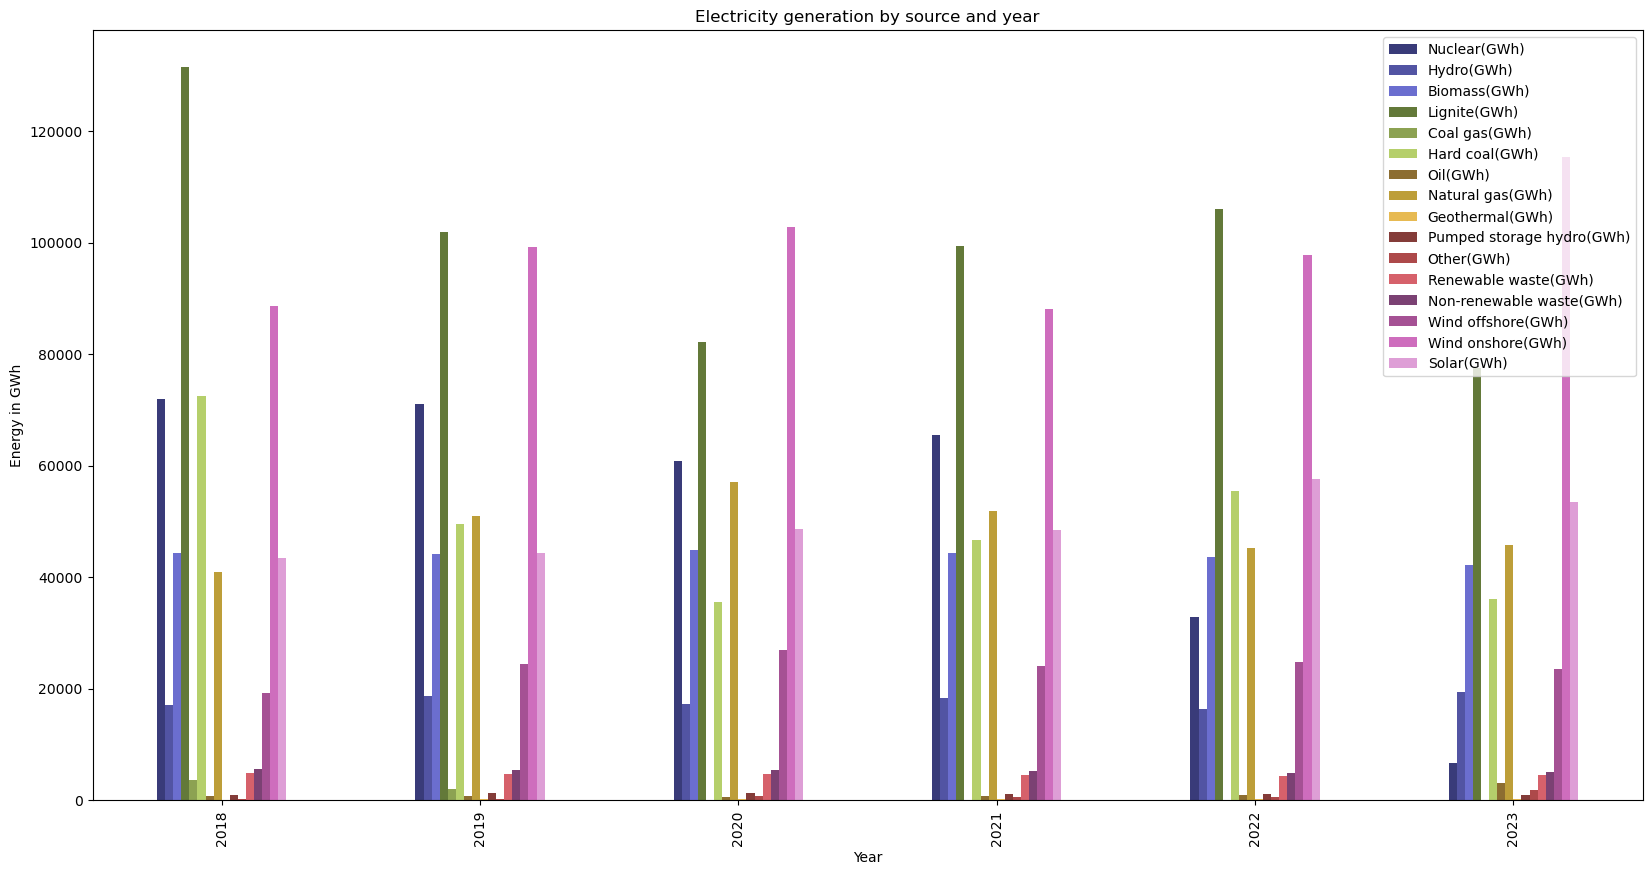

In [16]:
fig = df_el_by_year.plot(kind = "bar", figsize = (20,10), title = "Electricity generation by source and year", ylabel = "Energy in GWh",colormap = "tab20b")

In the graph you can see: 
* Coal decline until 2020, then a resurgence (V-form) which can be explained by the need to fill the energy deficit caused by nuclear shutdowns
* Sharp decline in nuclear energy, caused by the shutdown of nuclear power plants 
* Steady expansion of wind and solar energy 
* Lignite and onshore wind as leading energy sources 

### Subtask_2d

Calculating how many days had more than 30% of electricity generated from solar energy

In [17]:
df_solar_greater_30_percent = df_el.loc[(df_el['Solar(GWh)']/(df_el["Total(GWh)"]) > 0.30)]
print("Days with over 30% solar power contribution:", df_solar_greater_30_percent.shape[0])

Days with over 30% solar power contribution: 32


### Subtask_2e

Distribution of daily wind power generation, separated into onshore and offshore

#### First: Onshore

In [18]:
onshore_df = pd.DataFrame(df_el["Wind onshore(GWh)"])
onshore_df

Wind onshore(GWh)
Day                          
2018-01-01             609.60
2018-01-02             393.20
2018-01-03             820.20
2018-01-04             551.90
2018-01-05             512.30
...                       ...
2023-12-27             391.67
2023-12-28             866.36
2023-12-29             910.13
2023-12-30             613.28
2023-12-31             614.10

[2191 rows x 1 columns]

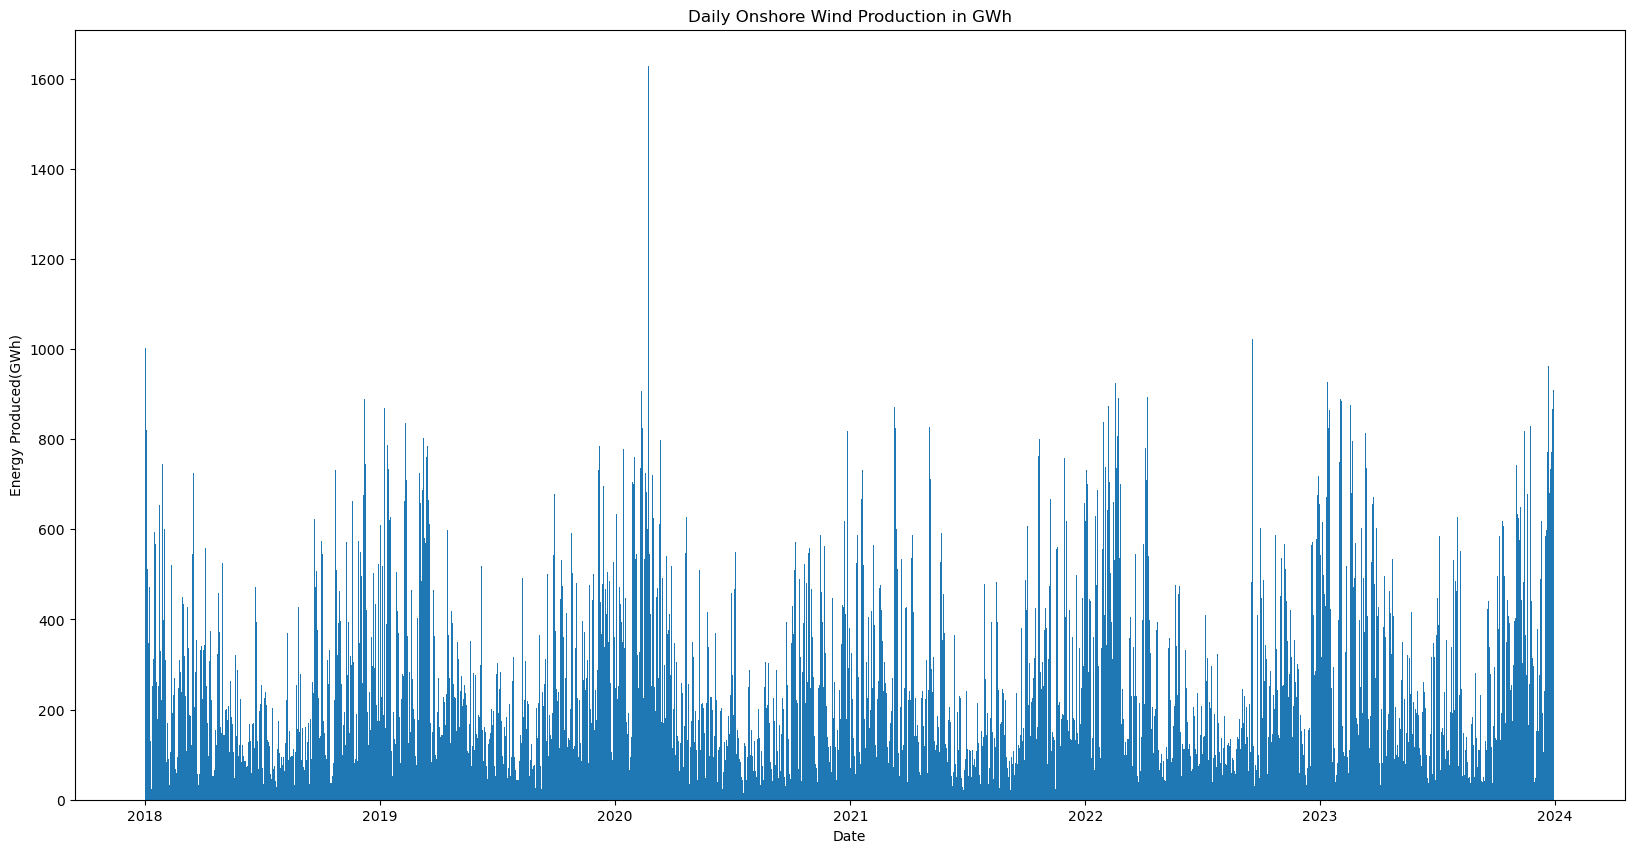

In [19]:
onshore_df['Date'] = pd.to_datetime(onshore_df.index) 

plt.figure(figsize=(20, 10))
plt.hist(onshore_df['Date'], bins=2176, weights=onshore_df['Wind onshore(GWh)'])

plt.xlabel('Date')
plt.ylabel('Energy Produced(GWh)')
plt.title('Daily Onshore Wind Production in GWh')

plt.show()

#### Next: Offshore

In [20]:
offshore_df = pd.DataFrame(df_el["Wind offshore(GWh)"])
offshore_df

Wind offshore(GWh)
Day                           
2018-01-01               76.40
2018-01-02               63.90
2018-01-03               92.30
2018-01-04               37.60
2018-01-05               28.00
...                        ...
2023-12-27               97.21
2023-12-28              125.05
2023-12-29              130.80
2023-12-30              135.20
2023-12-31              136.91

[2191 rows x 1 columns]

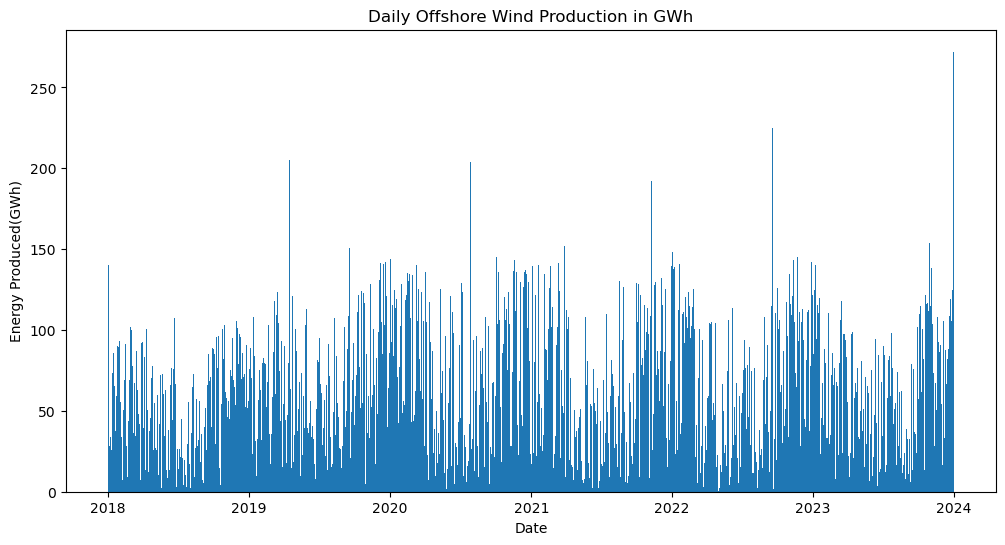

In [21]:
offshore_df['Date'] = pd.to_datetime(offshore_df.index) 

plt.figure(figsize=(12, 6))
plt.hist(offshore_df['Date'], bins=2176, weights=offshore_df['Wind offshore(GWh)'])

plt.xlabel('Date')
plt.ylabel('Energy Produced(GWh)')
plt.title('Daily Offshore Wind Production in GWh')

plt.show()

In the diagrams, it's evident that the energy produced by wind increases significantly in winter. This may be due to the difference in weather patterns in summer vs winter. In many regions, winter is associated with stronger and more consistent wind patterns and even storms.
The onshore production is greater overall, with 28,230 onshore installations compared to 1,501 offshore installations by the end of 2021. [[1]](https://www.enbw.com/unternehmen/eco-journal/offshore-windparks-alle-fakten-zur-windenergie-auf-see.html#:~:text=Ende%202021%20war%20die%20Anzahl,an%20Offshore-Anlagen%20mit%201.501.) 

### Subtask_2f

Generate descriptive statistics for the daily solar power generated per year and visualisation in box plots. 

2018
count    365.000000
mean     119.163014
std       75.444009
min        6.900000
25%       44.200000
50%      119.700000
75%      181.600000
max      271.800000
Name: Solar(GWh), dtype: float64
--------------------------
2019
count    365.000000
mean     121.602466
std       77.134277
min        5.700000
25%       49.300000
50%      116.100000
75%      185.300000
max      280.100000
Name: Solar(GWh), dtype: float64
--------------------------
2020
count    366.000000
mean     132.724590
std       84.286585
min        9.000000
25%       50.625000
50%      126.900000
75%      208.675000
max      307.900000
Name: Solar(GWh), dtype: float64
--------------------------
2021
count    365.000000
mean     132.680548
std       86.665768
min        5.600000
25%       46.200000
50%      132.000000
75%      200.400000
max      333.200000
Name: Solar(GWh), dtype: float64
--------------------------
2022
count    365.000000
mean     157.829863
std       98.948537
min        6.800000
25%       61.60

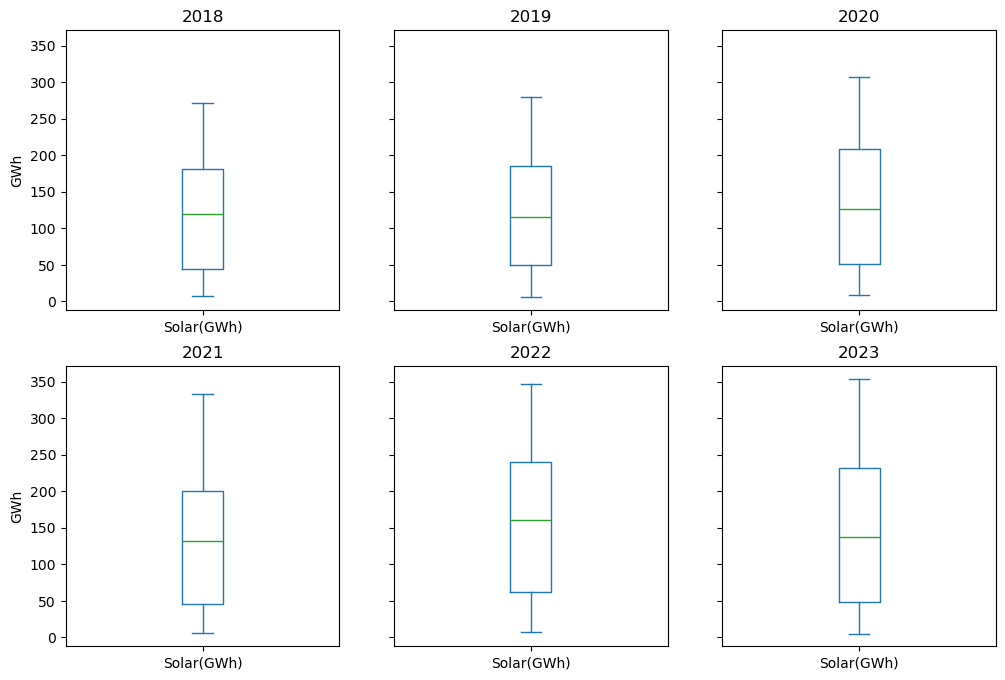

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 8), sharey = True)

years = {2018, 2019, 2020, 2021, 2022, 2023}
for i , year in enumerate(years): 
    row = i // 3
    col = i % 3
    df_year = df_el.loc[pd.to_datetime(df_el.index).year == year]["Solar(GWh)"]
    plot = df_year.plot(kind="box", ylabel="GWh", title=str(year), y=col, ax=axes[row, col])
    print(year)
    print(df_year.describe())
    print("--------------------------")

Although the solar irradiance has remained largely unchanged, there is an increase in solar energy production. This increase can be attributed to the significant expansion of PV installations during the period under consideration. The increased variance is due to the comissioning of individual extremely large PV installations (see task 5e), as this leads to greater prodcution fluctuations depending on the weather at these locations. 

# Task3

### Subtask_3a

Visualisation of monthly electricity generation

In [23]:
#separate the column "Total (GWh)" as it is the only one we will need
monthly_total_df = df_el["Total(GWh)"]
monthly_total_df

Day
2018-01-01    1403.70
2018-01-02    1495.70
2018-01-03    1748.80
2018-01-04    1650.80
2018-01-05    1646.90
               ...   
2023-12-27    1045.32
2023-12-28    1462.83
2023-12-29    1500.26
2023-12-30    1230.39
2023-12-31    1197.67
Name: Total(GWh), Length: 2191, dtype: float64

In [24]:
monthly_total_df = monthly_total_df.groupby(pd.Grouper(freq='M')).sum()

In [25]:
monthly_total_df = monthly_total_df.rename(index=lambda x: x.strftime('%B %Y'))

<Axes: title={'center': 'Monthly Total Production in Germany'}, xlabel='Day', ylabel='Energy in GWh'>

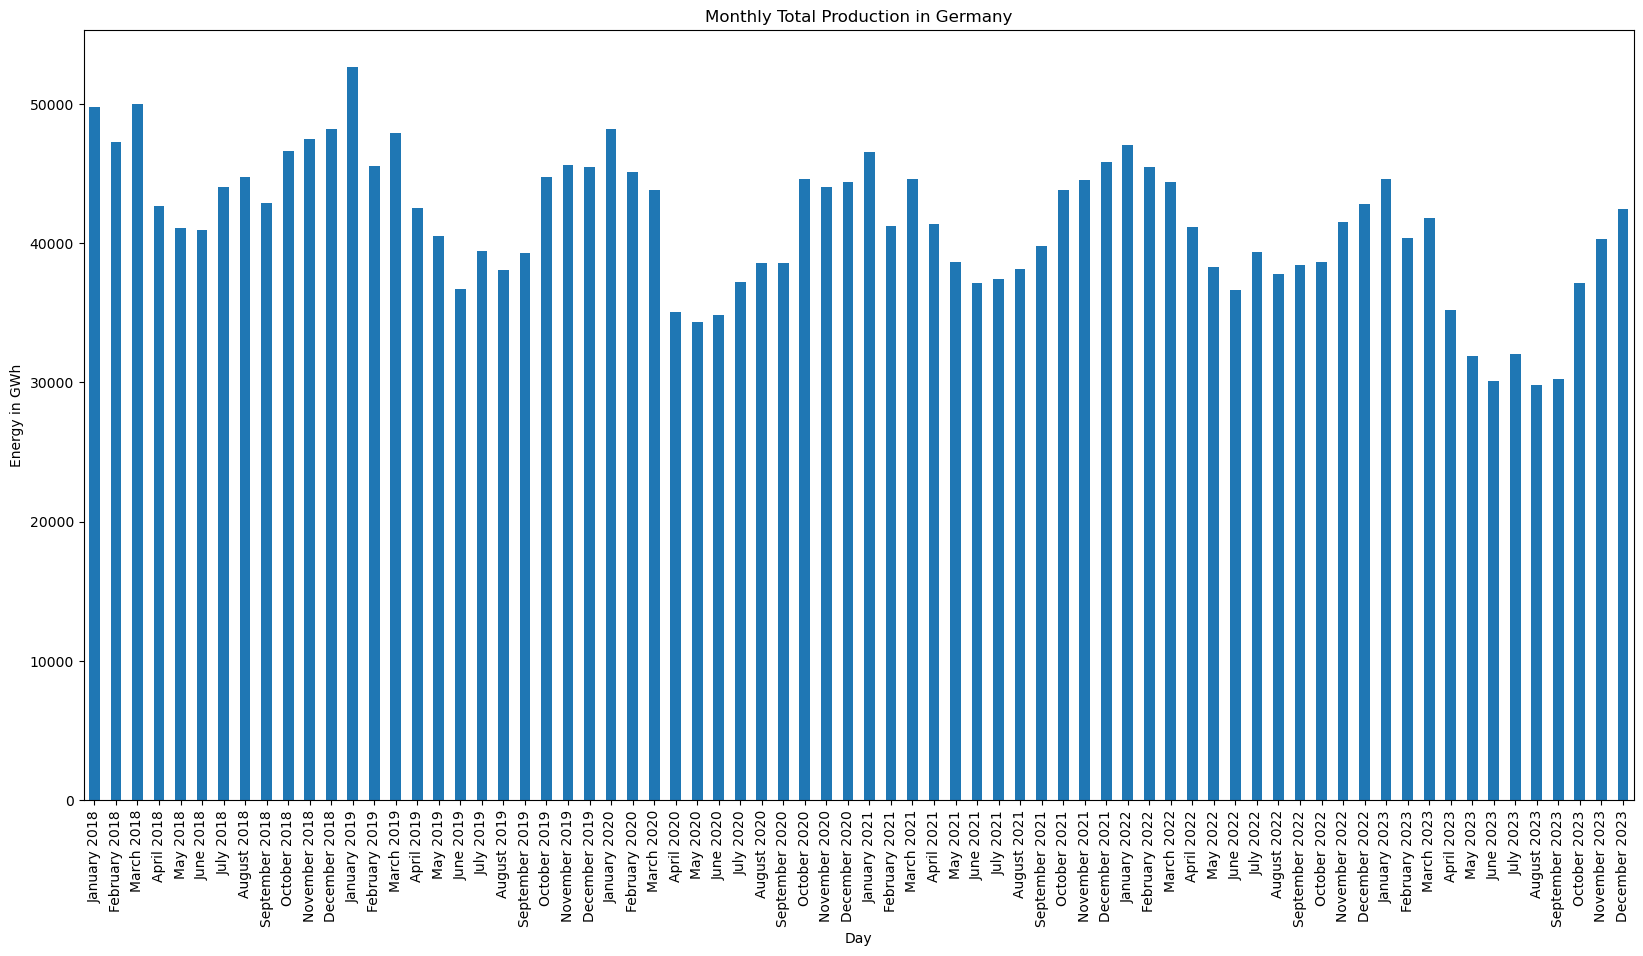

In [26]:
monthly_total_df.plot(kind="bar", figsize=(20,10), ylabel = "Energy in GWh", title = "Monthly Total Production in Germany")

In general, a downward trend is noticeable (excluding the last bar, December 2023, as it is not yet completed). It's evident that more energy is produced in winter than in summer, as more light and heat are needed during this period. Additionally you can see the successively warmer summers are leading to less electricity consumption in the summer. 

### Subtask_3b

Visualisation of the average energy produced by weekday

In [27]:
weekday_total_df = df_el["Total(GWh)"]
weekday_total_df = weekday_total_df.groupby(weekday_total_df.index.weekday).mean()

Wochentage: Monday = 0  Sunday = 6


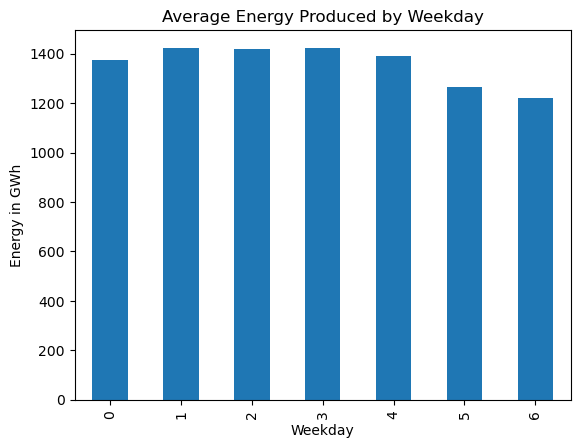

In [28]:
weekday_total_df.plot.bar(title="Average Energy Produced by Weekday", xlabel = "Weekday", ylabel="Energy in GWh")
print("Wochentage: Monday = 0  Sunday = 6")

It's noticeable that less energy is produced on weekends, presumably because less energy is consumed. However, the decrease in production is not very significant, as most industrial facilities operate throughout the weekend, and they account for the majority of energy consumption

### Subtask_3c

Classification of the energy sources, to then compare non-renewable to renewable energy
#### Non-renewable:
* Nuclear(GWh)
* Lignite(GWh)
* Coal gas(GWh)
* Hard coal(GWh)
* Oil(GWh)
* Natural gas(GWh)
* Non-renewable waste(GWh)

#### Renewable:
* Renewable waste(GWh)
* Wind offshore(GWh)
* Wind onshore(GWh)
* Solar(GWh)
* Geothermal(GWh)
* Pumped storage hydro(GWh)
* Hydro(GWh)
* Biomass(GWh)

#### Unbekannt:
* Other(GWh)

In [29]:
#calculate the sum of the renewable energies and adds it to new column, then drops the renewable energies, leaving the non-renewable columns 
green_split_df = df_el.copy()
green_split_df["Total Renewable(GWh)"] = green_split_df[["Renewable waste(GWh)","Wind offshore(GWh)","Wind onshore(GWh)",
"Solar(GWh)","Geothermal(GWh)","Pumped storage hydro(GWh)","Hydro(GWh)","Biomass(GWh)"]].sum(axis=1)
green_split_df.drop(columns = ["Renewable waste(GWh)","Wind offshore(GWh)","Wind onshore(GWh)",
"Solar(GWh)","Geothermal(GWh)","Pumped storage hydro(GWh)","Hydro(GWh)","Biomass(GWh)", "Total(GWh)", "Wind Total(GWh)"], inplace = True)
green_split_df

Nuclear(GWh)  Lignite(GWh)  Coal gas(GWh)  Hard coal(GWh)  \
Day                                                                     
2018-01-01         156.8        204.50            8.9           43.60   
2018-01-02         220.9        355.10           10.4          107.60   
2018-01-03         196.0        248.00            8.3           65.30   
2018-01-04         216.8        319.90            9.1          176.60   
2018-01-05         209.6        338.50            9.0          192.90   
...                  ...           ...            ...             ...   
2023-12-27           0.0        109.89            0.0           43.47   
2023-12-28           0.0         77.25            0.0           59.71   
2023-12-29           0.0         74.39            0.0           60.77   
2023-12-30           0.0         78.90            0.0           53.99   
2023-12-31           0.0         78.01            0.0           48.26   

            Oil(GWh)  Natural gas(GWh)  Other(GWh)  Non-renewable waste(GWh)  \
Day                                                                            
2018-01-01      2.30             66.30        1.20                     15.10   
2018-01-02      2.40            117.90        1.60                     15.20   
2018-01-03      2.30             92.10        1.40                     16.40   
2018-01-04      2.30            113.20        1.50                     15.90   
2018-01-05      2.30            123.40        1.40                     14.70   
...              ...               ...         ...                       ...   
2023-12-27      9.61            125.11        6.78                     15.12   
2023-12-28     10.48             77.81        4.90                     14.99   
2023-12-29      9.31             71.84        4.90                     14.49   
2023-12-30      9.37             79.68        5.78                     14.42   
2023-12-31      9.43             70.11        5.07                     14.40   

            Total Renewable(GWh)  
Day                               
2018-01-01                905.00  
2018-01-02                664.60  
2018-01-03               1119.00  
2018-01-04                795.50  
2018-01-05                755.10  
...                          ...  
2023-12-27                735.34  
2023-12-28               1217.69  
2023-12-29               1264.56  
2023-12-30                988.25  
2023-12-31                972.39  

[2191 rows x 9 columns]

In [30]:
#calculate the sum of the non-renewable energies and adds it to new column, then drops the non-renewable energies 
green_split_df["Total Non-Renewable(GWh)"] = green_split_df[["Nuclear(GWh)","Lignite(GWh)","Coal gas(GWh)",
                                                                 "Hard coal(GWh)","Oil(GWh)","Natural gas(GWh)","Non-renewable waste(GWh)"]].sum(axis=1)
green_split_df.drop(columns = ["Nuclear(GWh)","Lignite(GWh)","Coal gas(GWh)",
                                                                 "Hard coal(GWh)","Oil(GWh)","Natural gas(GWh)","Non-renewable waste(GWh)"], inplace = True)

In [31]:
green_split_df = green_split_df.groupby(green_split_df.index.year).sum()

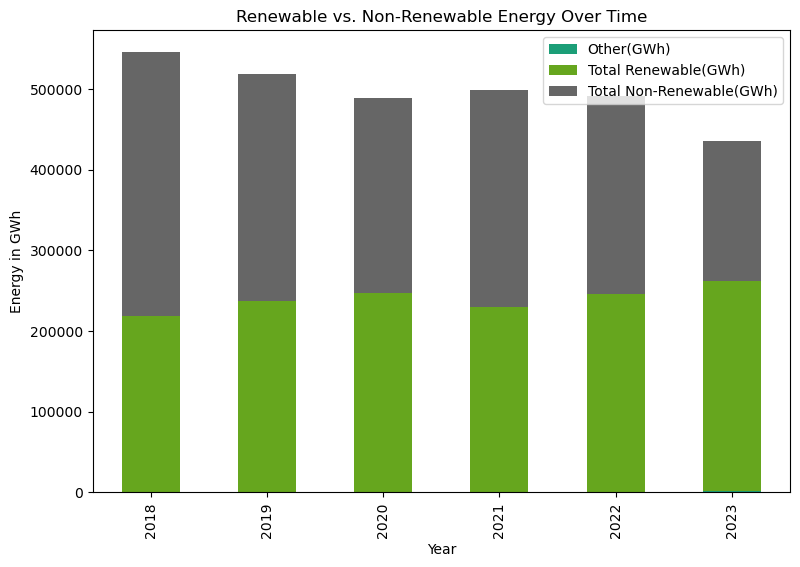

In [32]:
fig = green_split_df.plot(kind="bar", stacked = True, figsize=(9,6), colormap = "Dark2",xlabel= "Year", ylabel= "Energy in GWh", 
                    title = "Renewable vs. Non-Renewable Energy Over Time")

As you can see, the proportion of renewable energy to non-renewable energy is steadily growing. The Non-Renewable Energy is declining overall. Both aspects fit the goals that Germany has set for energy production, wanting to rely more heavily on renewable energy and slowly walk away from non-renewable energy.

### Subtask_3d

Visualisation of the proportion of Nuclear energy compared to the Total of energy producion.

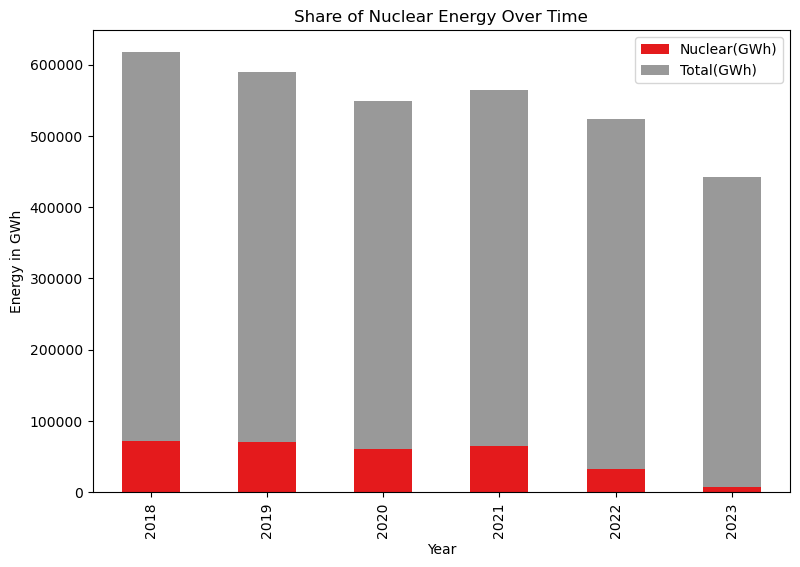

In [33]:
nuclear_part_df = df_el.groupby(df_el.index.year).sum()
nuclear_part_df = nuclear_part_df.drop( columns = ["Hydro(GWh)","Biomass(GWh)","Lignite(GWh)","Coal gas(GWh)","Hard coal(GWh)",
                                        "Oil(GWh)","Natural gas(GWh)","Geothermal(GWh)","Pumped storage hydro(GWh)","Other(GWh)","Renewable waste(GWh)",
                                        "Non-renewable waste(GWh)","Wind offshore(GWh)","Wind onshore(GWh)","Solar(GWh)","Wind Total(GWh)"])
fig = nuclear_part_df.plot(kind="bar", stacked = True, figsize=(9,6), colormap = "Set1",xlabel= "Year", ylabel= "Energy in GWh", 
                    title = "Share of Nuclear Energy Over Time")

You can clearly see that Nuclear production has declined a lot since 2018, and has been turned off in April of 2023. 

### Subtask_3e

Visualisation of the produced energy by energy source. For that we will first drop the columns with Total values, as we only want the energy sources themself. 

In [34]:
df_el = df_el.drop("Wind Total(GWh)", axis = 1)
df_el

Nuclear(GWh)  Hydro(GWh)  Biomass(GWh)  Lignite(GWh)  \
Day                                                                
2018-01-01         156.8       46.70        126.60        204.50   
2018-01-02         220.9       47.10        128.30        355.10   
2018-01-03         196.0       48.80        127.70        248.00   
2018-01-04         216.8       51.80        128.40        319.90   
2018-01-05         209.6       52.00        128.70        338.50   
...                  ...         ...           ...           ...   
2023-12-27           0.0       58.08        120.08        109.89   
2023-12-28           0.0       56.76        121.76         77.25   
2023-12-29           0.0       54.64        122.82         74.39   
2023-12-30           0.0       53.26        123.31         78.90   
2023-12-31           0.0       53.86        124.90         78.01   

            Coal gas(GWh)  Hard coal(GWh)  Oil(GWh)  Natural gas(GWh)  \
Day                                                                     
2018-01-01            8.9           43.60      2.30             66.30   
2018-01-02           10.4          107.60      2.40            117.90   
2018-01-03            8.3           65.30      2.30             92.10   
2018-01-04            9.1          176.60      2.30            113.20   
2018-01-05            9.0          192.90      2.30            123.40   
...                   ...             ...       ...               ...   
2023-12-27            0.0           43.47      9.61            125.11   
2023-12-28            0.0           59.71     10.48             77.81   
2023-12-29            0.0           60.77      9.31             71.84   
2023-12-30            0.0           53.99      9.37             79.68   
2023-12-31            0.0           48.26      9.43             70.11   

            Geothermal(GWh)  Pumped storage hydro(GWh)  Other(GWh)  \
Day                                                                  
2018-01-01             0.40                       1.10        1.20   
2018-01-02             0.40                       1.20        1.60   
2018-01-03             0.40                       1.50        1.40   
2018-01-04             0.40                       1.70        1.50   
2018-01-05             0.40                       1.50        1.40   
...                     ...                        ...         ...   
2023-12-27             0.49                       2.76        6.78   
2023-12-28             0.49                       1.54        4.90   
2023-12-29             0.49                       2.32        4.90   
2023-12-30             0.49                       2.52        5.78   
2023-12-31             0.49                       3.02        5.07   

            Renewable waste(GWh)  Non-renewable waste(GWh)  \
Day                                                          
2018-01-01                 13.10                     15.10   
2018-01-02                 13.30                     15.20   
2018-01-03                 14.30                     16.40   
2018-01-04                 13.90                     15.90   
2018-01-05                 12.80                     14.70   
...                          ...                       ...   
2023-12-27                 13.40                     15.12   
2023-12-28                 13.28                     14.99   
2023-12-29                 12.84                     14.49   
2023-12-30                 12.78                     14.42   
2023-12-31                 12.76                     14.40   

            Wind offshore(GWh)  Wind onshore(GWh)  Solar(GWh)  Total(GWh)  
Day                                                                        
2018-01-01               76.40             609.60       31.10     1403.70  
2018-01-02               63.90             393.20       17.20     1495.70  
2018-01-03               92.30             820.20       13.80     1748.80  
2018-01-04               37.60             551.90        9.80     1650.80  
201

In [35]:
smoothed_df = df_el.rolling(window=25).mean()
smoothed_df = smoothed_df.sort_index(axis=0)
smoothed_df = smoothed_df.drop(columns = ["Total(GWh)"])
smoothed_df

Nuclear(GWh)  Hydro(GWh)  Biomass(GWh)  Lignite(GWh)  \
Day                                                                
2018-01-01           NaN         NaN           NaN           NaN   
2018-01-02           NaN         NaN           NaN           NaN   
2018-01-03           NaN         NaN           NaN           NaN   
2018-01-04           NaN         NaN           NaN           NaN   
2018-01-05           NaN         NaN           NaN           NaN   
...                  ...         ...           ...           ...   
2023-12-27           0.0     57.4860      122.1536      232.8620   
2023-12-28           0.0     57.4052      122.1580      221.6816   
2023-12-29           0.0     57.3740      122.2140      209.7516   
2023-12-30           0.0     57.2768      122.2828      198.5828   
2023-12-31           0.0     57.1704      122.3820      187.2180   

            Coal gas(GWh)  Hard coal(GWh)  Oil(GWh)  Natural gas(GWh)  \
Day                                                                     
2018-01-01            NaN             NaN       NaN               NaN   
2018-01-02            NaN             NaN       NaN               NaN   
2018-01-03            NaN             NaN       NaN               NaN   
2018-01-04            NaN             NaN       NaN               NaN   
2018-01-05            NaN             NaN       NaN               NaN   
...                   ...             ...       ...               ...   
2023-12-27            0.0        127.0436   10.1920          173.9124   
2023-12-28            0.0        120.1244   10.2332          168.4484   
2023-12-29            0.0        113.0844   10.1996          160.2440   
2023-12-30            0.0        106.3832   10.1108          152.7932   
2023-12-31            0.0         98.4996    9.9408          143.0080   

            Geothermal(GWh)  Pumped storage hydro(GWh)  Other(GWh)  \
Day                                                                  
2018-01-01              NaN                        NaN         NaN   
2018-01-02              NaN                        NaN         NaN   
2018-01-03              NaN                        NaN         NaN   
2018-01-04              NaN                        NaN         NaN   
2018-01-05              NaN                        NaN         NaN   
...                     ...                        ...         ...   
2023-12-27             0.49                     2.9352      6.3336   
2023-12-28             0.49                     2.8604      6.2320   
2023-12-29             0.49                     2.8120      6.1264   
2023-12-30             0.49                     2.7272      6.1024   
2023-12-31             0.49                     2.6180      6.0052   

            Renewable waste(GWh)  Non-renewable waste(GWh)  \
Day                                                          
2018-01-01                   NaN                       NaN   
2018-01-02                   NaN                       NaN   
2018-01-03                   NaN                       NaN   
2018-01-04                   NaN                       NaN   
2018-01-05                   NaN                       NaN   
...                          ...                       ...   
2023-12-27               11.8516                   13.3768   
2023-12-28               11.9268                   13.4616   
2023-12-29               11.9876                   13.5300   
2023-12-30               12.0640                   13.6160   
2023-12-31               12.1208                   13.6800   

            Wind offshore(GWh)  Wind onshore(GWh)  Solar(GWh)  
Day                                                            
2018-01-01                 NaN                NaN         NaN  
2018-01-02                 NaN                NaN         NaN  
2018-01-03                 NaN                NaN         NaN  
2018-01-04                 NaN                NaN         NaN  
2018-01-05                 NaN                NaN         NaN  
...        

In [36]:
fig = px.line(smoothed_df, x=smoothed_df.index, y=list(smoothed_df.columns),
              labels={'value': 'Energy (GWh)', 'variable': 'Energy Source'},
              title='Energy Produced Over Time', width=1080, height=600,)

fig.show()

### Subtask_3f
Analysation of the Graph of Subtask 3e

#### Behavior of Solar, Nuclear, Hard Coal, and Lignite

* Solar: It is immediately noticeable that solar energy exhibits remarkably periodic production. This can be explained by the shorter winter days and lower solar irradiance during the winter season (see subtask 4c). Additionally, it is evident that production steadily increases, which can be attributed to the government's focus on renewable energies.

* Nuclear: The production of nuclear energy is declining noticeably, and on April 15, 2023, it even drops to 0. This can be explained by Germany's exit from nuclear energy. Three distinct drops are visible: first, at the end of 2019 with the shutdown of Philippsburg 2, then at the end of 2021, attributed to the shutdown of the Gundremmingen C, Grohnde, and Brokdorf power plants. The last drop is on April 15, 2023, to 0, with the shutdown of the last three power plants Isar/Ohu 2, Emsland, and Neckarwestheim 2.

* Hard Coal and Lignite: Coal energy is particularly interesting as it showed a clear downward trend until mid-2020, but then suddenly regained importance and by 2023 is actually at a comparable level to early 2018. This can be explained by the deficit in German energy production resulting from the shutdown of nuclear power plants, which was filled by coal energy. This is clearly evident as coal rises relatively concurrently with the decline of nuclear energy and reaches a level similar to that of nuclear energy.

# Task4

### Subtask_4a

Function to retrieve weather data from the open-meteo API

In [37]:
def get_weather_data(lat, lon, start_date, end_date):
    # Setting up Open-Meteo API client with caching and retry on error
    cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
    retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
    openmeteo = openmeteo_requests.Client(session = retry_session)
    
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "et0_fao_evapotranspiration"],
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    daily = response.Daily()
    
    daily_data = {"date": pd.date_range(
        start = pd.to_datetime(daily.Time(), unit = "s"),
        end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
        freq = pd.Timedelta(seconds = daily.Interval()),
        inclusive = "left"
    )}
    
    #Saving the variables in their respective columns
    daily_data["weather_code(WMO)"] = daily.Variables(0).ValuesAsNumpy()
    daily_data["temperature_2m_max(°C)"] = daily.Variables(1).ValuesAsNumpy()
    daily_data["temperature_2m_min(°C)"] = daily.Variables(2).ValuesAsNumpy()
    daily_data["temperature_2m_mean(°C)"] = daily.Variables(3).ValuesAsNumpy()
    daily_data["apparent_temperature_max(°C)"] = daily.Variables(4).ValuesAsNumpy()
    daily_data["apparent_temperature_min(°C)"] = daily.Variables(5).ValuesAsNumpy()
    daily_data["apparent_temperature_mean(°C)"] = daily.Variables(6).ValuesAsNumpy()
    daily_data["sunrise"] = daily.Variables(7).ValuesAsNumpy()
    daily_data["sunset"] = daily.Variables(8).ValuesAsNumpy()
    daily_data["daylight_duration(s)"] = daily.Variables(9).ValuesAsNumpy()
    daily_data["sunshine_duration(s)"] = daily.Variables(10).ValuesAsNumpy()
    daily_data["precipitation_sum(mm)"] = daily.Variables(11).ValuesAsNumpy()
    daily_data["rain_sum(mm)"] =  daily.Variables(12).ValuesAsNumpy()
    daily_data["snowfall_sum(cm)"] = daily.Variables(13).ValuesAsNumpy()
    daily_data["precipitation_hours"] = daily.Variables(14).ValuesAsNumpy()
    daily_data["wind_speed_10m_max(km/h)"] = daily.Variables(15).ValuesAsNumpy()
    daily_data["wind_gusts_10m_max(km/h)"] = daily.Variables(16).ValuesAsNumpy()
    daily_data["wind_direction_10m_dominant(°)"] = daily.Variables(17).ValuesAsNumpy()
    daily_data["shortwave_radiation_sum(MJ/m²)"] = daily.Variables(18).ValuesAsNumpy()
    daily_data["et0_fao_evapotranspiration(mm)"] = daily.Variables(19).ValuesAsNumpy()
    
    #Converting sunshine duration and daylight duration from seconds to hours
    df_weather = pd.DataFrame(data = daily_data)
    df_weather['sunshine_duration(h)'] = df_weather['sunshine_duration(s)']/60/60
    df_weather['daylight_duration(h)'] = df_weather['daylight_duration(s)']/60/60
    
    #Removing sunshine duration and daylight duration in seconds
    #Removing sunrise and sunset values as they are always 0 
    df_weather.drop(columns = ["sunrise", "sunset", 'sunshine_duration(s)', 'daylight_duration(s)'], inplace = True) 
    return df_weather

In [38]:
#Retrieving weather data for the city of Amberg for 2018-2023
df_weather = get_weather_data(49.4429, 11.8627, "2018-01-01", "2023-12-31")

In [39]:
df_weather

date  weather_code(WMO)  temperature_2m_max(°C)  \
0    2018-01-01               71.0                8.922500   
1    2018-01-02               73.0                5.072500   
2    2018-01-03               71.0                8.972500   
3    2018-01-04               71.0               10.072499   
4    2018-01-05               61.0                8.372499   
...         ...                ...                     ...   
2186 2023-12-27                3.0                8.872499   
2187 2023-12-28               53.0                9.222500   
2188 2023-12-29               51.0               10.172500   
2189 2023-12-30               51.0                9.322499   
2190 2023-12-31               51.0                5.822500   

      temperature_2m_min(°C)  temperature_2m_mean(°C)  \
0                     1.9725                 5.476667   
1                     1.4225                 3.005833   
2                     1.0225                 4.862084   
3                     3.7225                 5.216250   
4                     4.7725                 6.855834   
...                      ...                      ...   
2186                  2.2725                 4.799584   
2187                  1.7225                 5.701666   
2188                  5.6725                 7.728750   
2189                  0.3225                 5.980833   
2190                  0.9225                 3.322500   

      apparent_temperature_max(°C)  apparent_temperature_min(°C)  \
0                         4.668323                     -2.319474   
1                         0.745056                     -2.827738   
2                         3.171541                     -2.872294   
3                         5.913445                     -1.695934   
4                         5.662585                      0.137214   
...                            ...                           ...   
2186                      5.855928                     -1.290964   
2187                      6.546541                     -2.060504   
2188                      6.168093                      2.614758   
2189                      5.310280                     -3.255291   
2190                      2.331770                     -2.634386   

      apparent_temperature_mean(°C)  precipitation_sum(mm)  rain_sum(mm)  \
0                          1.137585                    1.4      1.200000   
1                         -1.425858                    7.5      7.000000   
2                         -0.740206                   10.7     10.299999   
3                          1.100277                   18.4     18.299999   
4                          3.397982                    5.8      5.800000   
...                             ...                    ...           ...   
2186                       1.902956                    0.0      0.000000   
2187                       2.673577                    1.1      1.100000   
2188                       4.218830                    0.9      0.900000   
2189                       2.133890                    0.2      0.200000   
2190                      -0.061515                    0.5      0.500000   

      snowfall_sum(cm)  precipitation_hours  wind_speed_10m_max(km/h)  \
0                 0.14                  6.0                 22.796841   
1                 0.35                 15.0                 27.645092   
2                 0.28                 13.0                 34.217045   
3                 0.07                 19.0                 28.817993   
4                 0.00                 10.0                 25.982424   
...                ...                  ...                       ...   
2186              0.00                  0.0                 12.429127   
2187              0.00                  5.0                 12.313894   
2188              0.00                  4.0                 25.809765   
2189              0.00                  1.0                 22.805367   
2190              0.00                  4.0     

### Subtask_4b

Correlations between the variables in the weather dataset

In [40]:
corrmatrix = df_weather.corr()
x = corrmatrix.columns 
y = corrmatrix.index
z = np.array(corrmatrix)
fig = go.Figure()
fig.add_trace(go.Heatmap(x = x, y = y, z = z, colorscale = 'electric'))
fig.show()

Correlations between the weather variables: 
* It's evident that actual temperature and perceived temperature have a strong correlation. Additionally, both correlate relatively strongly (0.73-0.79) with daylight duration. This aligns with the distribution of temperature and daylight duration throughout the year: daylight duration and temperature are significantly lower in winter compared to summer.
* All sun-related variables are strongly correlated: sunshine duration, daylight duration, solar radiation (see subtask g).
* The sun-related variables also have a relatively strong correlation with temperature variables (around 0.6 for minimum temperature and around 0.8 for maximum temperature). Thus, higher and more intense sunlight correlates with higher temperatures, which is consistent with the seasons.
* There is a negative correlation between the number of sunshine hours and the total precipitation sum (-0.5). Sunshine hours are only measured when the solar radiation exceeds 120 W/m² according to the WMO definition. Therefore, sunshine hours must come through precipitation to be measured at all. [[2]](https://open-meteo.com/en/docs/historical-weather-api)

### Subtask_4c

Comparison of the number of sunshine hours and annual solar radiation each year

In [41]:
years = {2018, 2019, 2020, 2021, 2022, 2023}
for year in years: 
    df_year = df_weather.loc[df_weather['date'].dt.year == year]
    print(year)
    print("Number of sunshine hours:", df_year['sunshine_duration(h)'].sum(), "h")
    print("Annual solar radiation:", df_year['shortwave_radiation_sum(MJ/m²)'].sum(), "MJ/m²")
    print("-----------------------------------------------")

2018
Number of sunshine hours: 2884.1228 h
Annual solar radiation: 4545.05 MJ/m²
-----------------------------------------------
2019
Number of sunshine hours: 2771.5342 h
Annual solar radiation: 4425.43 MJ/m²
-----------------------------------------------
2020
Number of sunshine hours: 2768.2988 h
Annual solar radiation: 4303.3896 MJ/m²
-----------------------------------------------
2021
Number of sunshine hours: 2706.4558 h
Annual solar radiation: 4270.29 MJ/m²
-----------------------------------------------
2022
Number of sunshine hours: 2822.8125 h
Annual solar radiation: 4577.17 MJ/m²
-----------------------------------------------
2023
Number of sunshine hours: 2675.7417 h
Annual solar radiation: 4441.45 MJ/m²
-----------------------------------------------


There is no significant difference between the years, neither in the number of sunshine hours nor the annual solar radiation. 

### Subtask_4d

Comparison of the aggregates solar radiation per month between the years 2018-2023

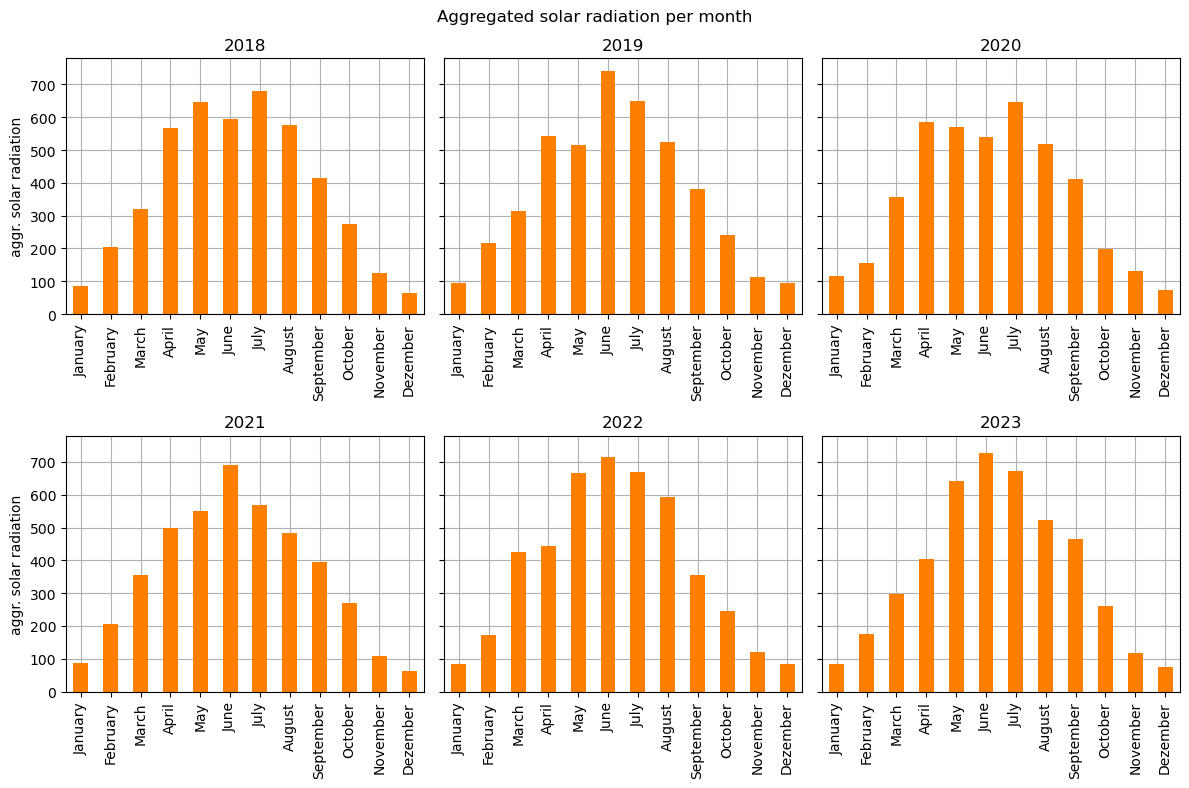

In [42]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Dezember']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 8), sharey = 'all')
fig.suptitle("Aggregated solar radiation per month")

years = {2018, 2019, 2020, 2021, 2022, 2023}
for i , year in enumerate(years): 
    row = i // 3
    col = i % 3
    df_year = df_weather.loc[df_weather['date'].dt.year == year]
    group_year = df_year.groupby(df_year['date'].dt.month)['shortwave_radiation_sum(MJ/m²)'].sum()
    plot = group_year.plot(kind = 'bar', xlabel = '', ylabel = 'aggr. solar radiation', y=col, ax=axes[row, col], title = year, colormap = 'Wistia_r', grid = True)
    plot.set_xticklabels(months)
    plot.set_axisbelow(True)

plt.tight_layout()

The periodic cycle of seasons is clearly visible: towards summer, there's a steady increase, and towards winter, there's a decline. This cycle repeats consistently, with no real difference between the years. 

### Subtask_4e

Visualisation of the maximum daily temperature, sunshine duration, and solar radiation per day over the observation period

#### maximum daily temperature

In [43]:
df_weather = df_weather.set_index("date")

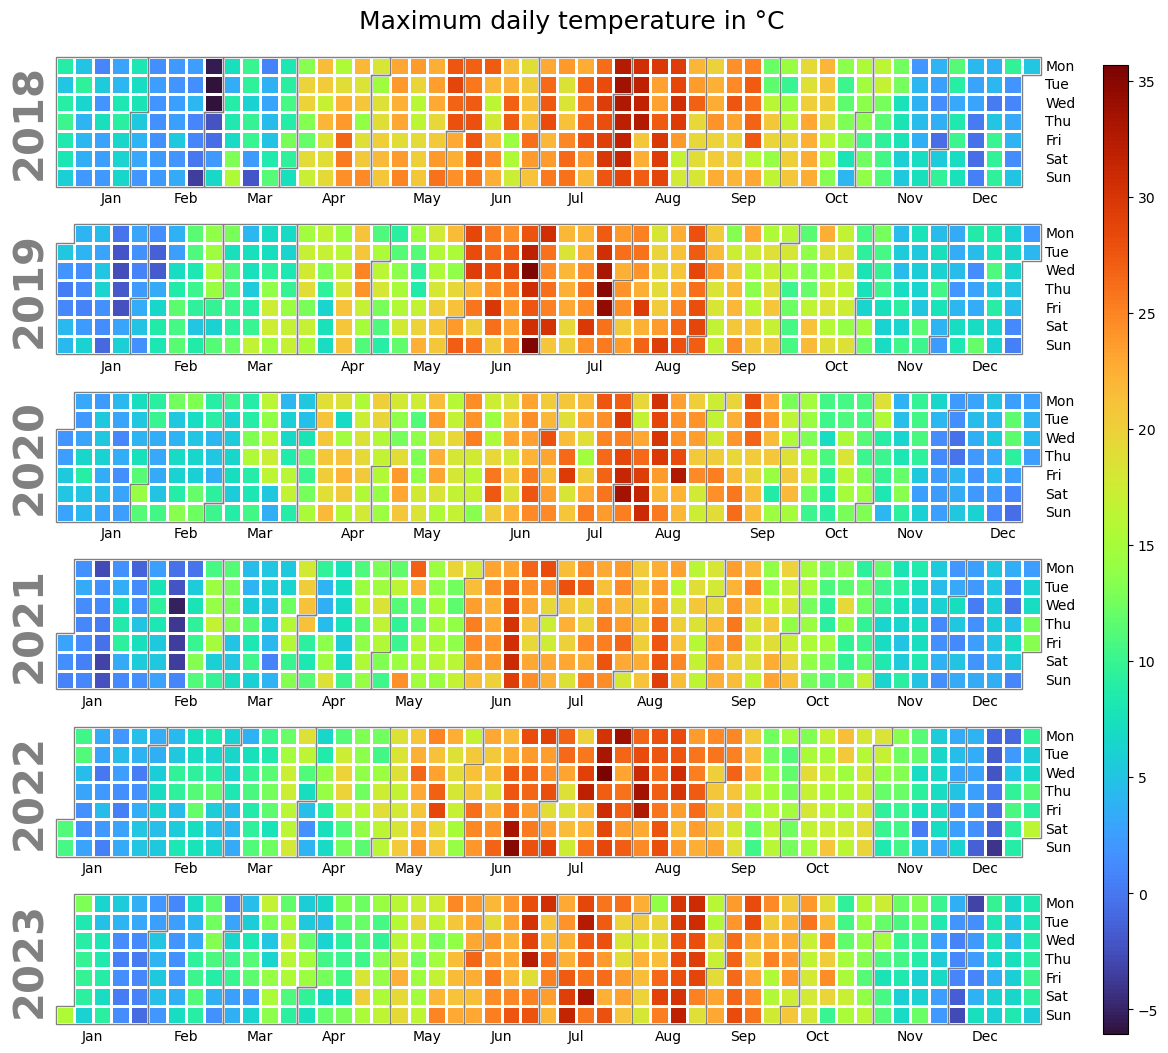

In [44]:
title = 'Maximum daily temperature in °C'
fig, axes = calplot.calplot(df_weather['temperature_2m_max(°C)'], cmap  = 'turbo', suptitle = title, suptitle_kws = {'fontsize': 18}, yearlabel_kws = {'fontname':'sans-serif'})

#### sunshine duration

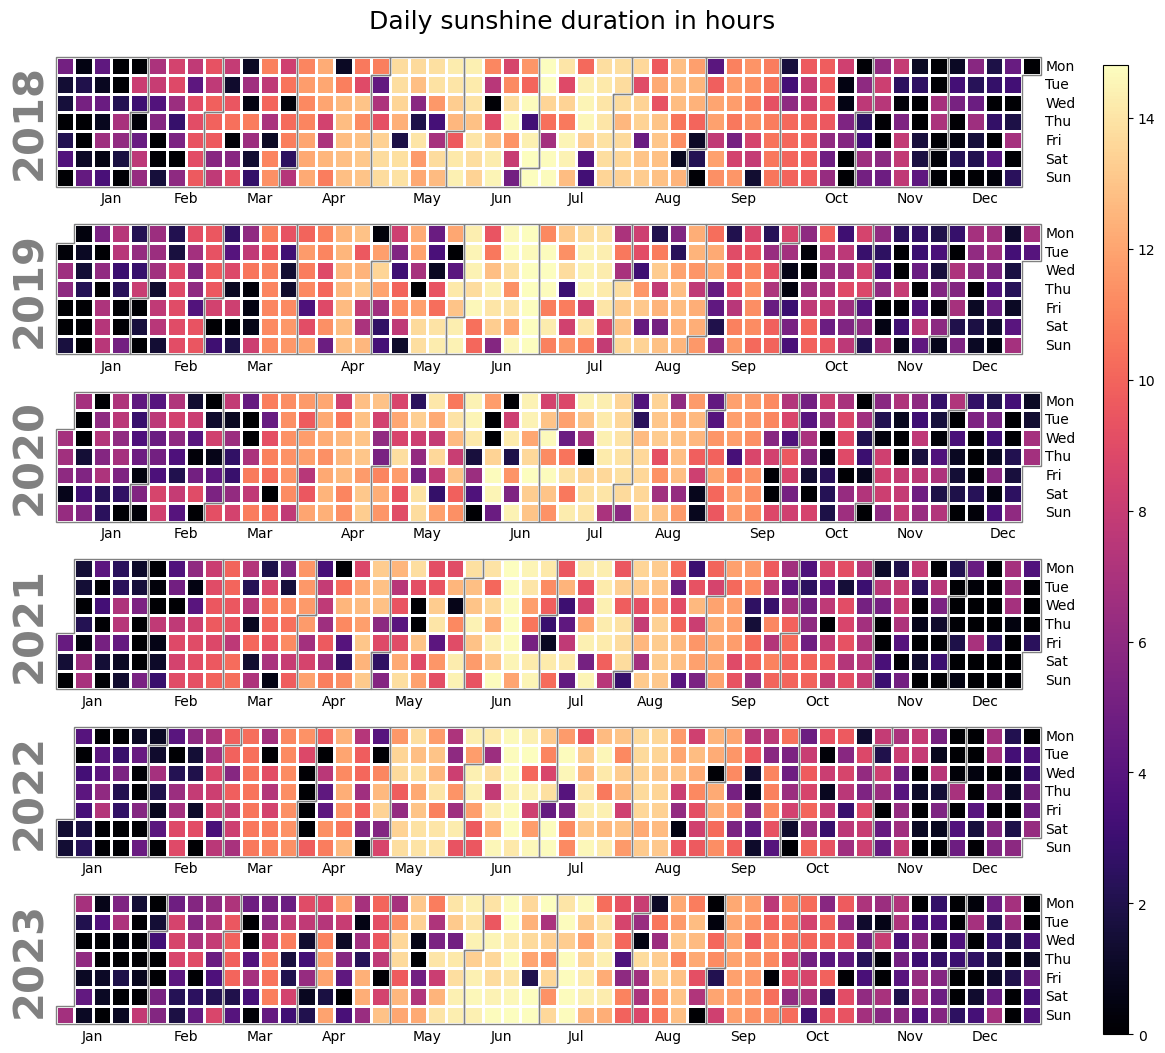

In [45]:
title = 'Daily sunshine duration in hours'
fig, axes = calplot.calplot(df_weather['sunshine_duration(h)'], cmap  = 'magma', suptitle = title, suptitle_kws = {'fontsize': 18}, yearlabel_kws = {'fontname':'sans-serif'})

#### solar radiation

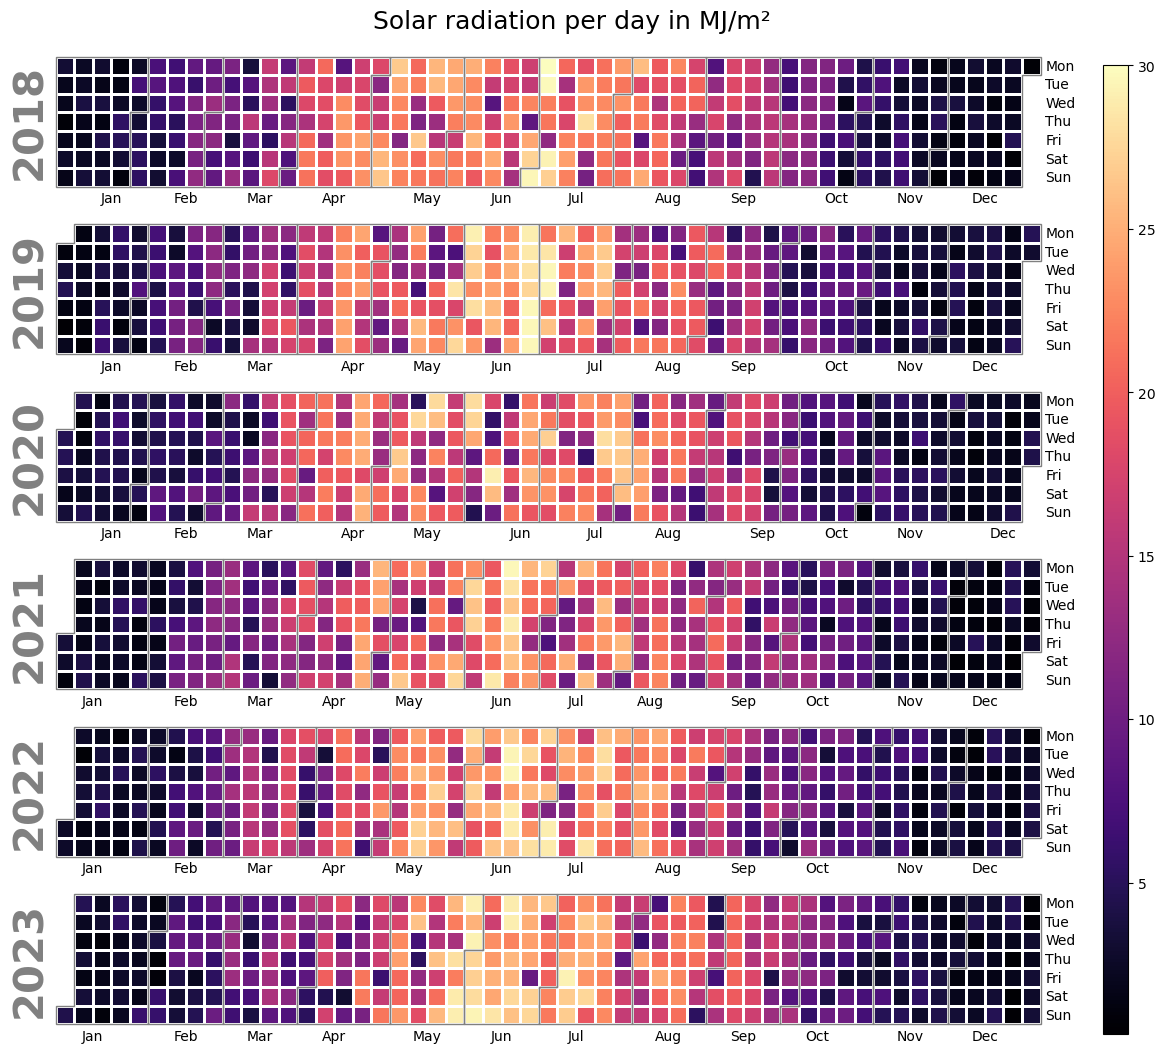

In [46]:
title = 'Solar radiation per day in MJ/m²'
fig, axes = calplot.calplot(df_weather['shortwave_radiation_sum(MJ/m²)'], cmap  = 'magma', suptitle = title, suptitle_kws = {'fontsize': 18}, yearlabel_kws = {'fontname':'sans-serif'})

### Subtask_4f

The main developments and trends for sunshine duration, solar radiation, and temperatures over the observation period based on the results of the previous three subtasks.

Overall, the correlation between sunshine duration, temperature, and solar radiation is evident, with longer sunshine duration generally associated with higher temperatures and increased solar radiation. This relationship follows a seasonal pattern, with peaks typically occurring in summer months and declines thereafter. While there may be slight variations from year to year, the overall trends remain consistent throughout the observation period, highlighting the predictable nature of these variables in response to seasonal changes.

### Subtask_4g

Relationships between sun-related weather variables

In [47]:
#Saving the variables into a separate DataFrame
df_sun = pd.DataFrame()
df_sun['Solar(GWh)'] = df_el['Solar(GWh)']
df_sun['shortwave_radiation_sum'] = df_weather['shortwave_radiation_sum(MJ/m²)']
df_sun['daylight_duration'] = df_weather['daylight_duration(h)']
df_sun['sunshine_duration'] = df_weather['sunshine_duration(h)']
df_sun

Solar(GWh)  shortwave_radiation_sum  daylight_duration  \
Day                                                                  
2018-01-01       31.10                     3.22           8.251632   
2018-01-02       17.20                     1.93           8.269270   
2018-01-03       13.80                     1.90           8.288358   
2018-01-04        9.80                     0.76           8.308922   
2018-01-05       19.40                     1.91           8.331191   
...                ...                      ...                ...   
2023-12-27       51.65                     3.00           8.178308   
2023-12-28       32.45                     1.95           8.188211   
2023-12-29       30.52                     3.14           8.199767   
2023-12-30       47.41                     2.58           8.212935   
2023-12-31       26.35                     3.28           8.227687   

            sunshine_duration  
Day                            
2018-01-01           4.999405  
2018-01-02           1.411293  
2018-01-03           1.610004  
2018-01-04           0.000000  
2018-01-05           2.095850  
...                       ...  
2023-12-27           3.451000  
2023-12-28           1.000000  
2023-12-29           4.666962  
2023-12-30           3.306888  
2023-12-31           3.674354  

[2191 rows x 4 columns]

In [48]:
#Correlationmatrix to illustrate the relationships
corrmatrix = df_sun.corr()
fig = px.imshow(corrmatrix, text_auto=True, zmin = 0)
fig.show()

As evident in the correlation matrix, sun-related weather variables are strongly correlated with solar power generated in Germany. This makes sense, as the longer the sun shines, the higher the solar radiation can be, resulting in more solar power production. 

# Task5

### Subtask_5a
Reading the CSV files

In [49]:
dataframes = list()
#Setting non-automated data types as string, then directly converting registration and commissioning dates to dtype datetime
dtypes = {'EinheitMastrNummer': str, 'DatumLetzteAktualisierung': str, 'AnlagenbetreiberMastrNummer': str, 'Bundesland': str, 'Ort': str, 'Registrierungsdatum': str, 'EinheitBetriebsstatus': str, 'Inbetriebnahmedatum': str, 'NameStromerzeugungseinheit': str, 'Strasse': str, 'Hausnummer': str}
parse_dates = ['Registrierungsdatum', 'Inbetriebnahmedatum']

for i in range(1, 39):
    df_temp = pd.read_csv(r"Daten\Stromerzeugungseinheiten\EinheitenSolar_" + str(i) + ".csv", dtype = dtypes, parse_dates = parse_dates)
    dataframes.append(df_temp)
    
df_pv = pd.concat(dataframes)
df_pv = df_pv.rename(columns = {'Bruttoleistung': 'Bruttoleistung(kWp)'}) #adding the unit

In [50]:
df_pv

EinheitMastrNummer    DatumLetzteAktualisierung  \
0        SEE984033548619  2020-02-20T16:28:35.2508122   
1        SEE901901460125  2021-07-15T07:54:37.8637095   
2        SEE983679054270  2019-05-28T08:26:38.0316692   
3        SEE978732598938  2020-12-07T08:19:07.9860793   
4        SEE970592691989  2021-01-25T11:18:30.0433603   
...                  ...                          ...   
33286    SEE962666487727  2023-12-31T22:59:11.7688148   
33287    SEE927730726591  2023-12-31T23:10:22.2034456   
33288    SEE968204214268  2023-12-31T23:20:05.7126888   
33289    SEE939492601771  2024-01-01T00:37:48.5759672   
33290    SEE951511396703  2024-01-01T00:25:54.8339677   

      AnlagenbetreiberMastrNummer           Bundesland  Postleitzahl  \
0                 ABR949444220202  Nordrhein-Westfalen       48147.0   
1                 ABR930055871044    Baden-Württemberg       73529.0   
2                 ABR983885950021          Brandenburg       14641.0   
3                 ABR980052996196               Bayern       93080.0   
4                 ABR970373690446             Saarland       66740.0   
...                           ...                  ...           ...   
33286             ABR902834890140          Brandenburg       16827.0   
33287             ABR996492371288        Niedersachsen       37520.0   
33288             ABR934043306792  Nordrhein-Westfalen       45896.0   
33289             ABR959875806043            Thüringen       99310.0   
33290             ABR989059076832               Hessen       63179.0   

                    Ort Registrierungsdatum EinheitBetriebsstatus  \
0               Münster          2019-02-01            In Betrieb   
1      Schwäbisch Gmünd          2019-01-31            In Betrieb   
2                 Nauen          2019-01-31            In Betrieb   
3              Pentling          2019-01-31            In Betrieb   
4             Saarlouis          2019-01-31            In Betrieb   
...                 ...                 ...                   ...   
33286           Krangen          2023-12-31            In Betrieb   
33287          Osterode          2024-01-01            In Betrieb   
33288     Gelsenkirchen          2024-01-01            In Betrieb   
33289          Arnstadt          2024-01-01            In Planung   
33290      Obertshausen          2024-01-01            In Betrieb   

      Inbetriebnahmedatum                 NameStromerzeugungseinheit  \
0              2007-07-20                  Photovoltaikanlage ERWin4   
1              2013-01-31                                  man-power   
2              2016-02-19                                 eigene PVA   
3              2016-12-16  Photovoltaik EFH Löbert - Mattinger Weg 6   
4              2011-12-08                       PV-Anlage 7,2 (Voll)   
...                   ...                                        ...   
33286          2023-11-15                                  PVKrangen   
33287          2023-07-08                       Solaranlage Sperling   
33288          2024-01-01                                Garagendach   
33289                 NaT                                 Dachanlage   
33290          2024-01-01                            Balkonkraftwerk   

       Bruttoleistung(kWp)  AnzahlModule    Lage  Leistungsbegrenzung  \
0                     3.96          22.0   853.0                802.0   
1                     7.41          38.0   853.0                803.0   
2                     5.04          16.0   853.0                803.0   
3                     6.36          24.0   853.0               1535.0   
4                     7.20          30.0   853.0                802.0   
...                    ...           ...     ...                  ...   
33286                10.60          25.0   853.0                802.0   
33287                14.76          36.0   853.0                802.0   
33288                 0.80           2.0  2961.0                803.0   
33289                 2.64      

In [51]:
#controlling the dtypes of the columns, making sure that the dates are datetime64[ns]
df_pv.dtypes

EinheitMastrNummer                     object
DatumLetzteAktualisierung              object
AnlagenbetreiberMastrNummer            object
Bundesland                             object
Postleitzahl                          float64
Ort                                    object
Registrierungsdatum            datetime64[ns]
EinheitBetriebsstatus                  object
Inbetriebnahmedatum            datetime64[ns]
NameStromerzeugungseinheit             object
Bruttoleistung(kWp)                   float64
AnzahlModule                          float64
Lage                                  float64
Leistungsbegrenzung                   float64
Hauptausrichtung                      float64
Strasse                                object
Hausnummer                             object
Laengengrad                           float64
Breitengrad                           float64
dtype: object

In [52]:
#translating the german column names to english 
column_names = {'EinheitMastrNummer': 'UnitMastrNumber', 'DatumLetzteAktualisierung': 'LastUpdateDate', 'AnlagenbetreiberMastrNummer': 'PlantOperatorMastrNumber','Bundesland': 'FederalState','Postleitzahl': 'PostalCode','Ort': 'City','Registrierungsdatum': 'RegistrationDate','EinheitBetriebsstatus': 'UnitOperationStatus','Inbetriebnahmedatum': 'CommissioningDate','NameStromerzeugungseinheit': 'PowerPlantName','Bruttoleistung(kWp)': 'GrossCapacity(kWp)','AnzahlModule': 'NumberOfModules','Lage': 'Location','Leistungsbegrenzung': 'PowerLimitation','Hauptausrichtung': 'MainOrientation','Strasse': 'Street','Hausnummer': 'HouseNumber','Laengengrad': 'Longitude','Breitengrad': 'Latitude'}
df_pv = df_pv.rename(columns = column_names)
df_pv

UnitMastrNumber               LastUpdateDate PlantOperatorMastrNumber  \
0      SEE984033548619  2020-02-20T16:28:35.2508122          ABR949444220202   
1      SEE901901460125  2021-07-15T07:54:37.8637095          ABR930055871044   
2      SEE983679054270  2019-05-28T08:26:38.0316692          ABR983885950021   
3      SEE978732598938  2020-12-07T08:19:07.9860793          ABR980052996196   
4      SEE970592691989  2021-01-25T11:18:30.0433603          ABR970373690446   
...                ...                          ...                      ...   
33286  SEE962666487727  2023-12-31T22:59:11.7688148          ABR902834890140   
33287  SEE927730726591  2023-12-31T23:10:22.2034456          ABR996492371288   
33288  SEE968204214268  2023-12-31T23:20:05.7126888          ABR934043306792   
33289  SEE939492601771  2024-01-01T00:37:48.5759672          ABR959875806043   
33290  SEE951511396703  2024-01-01T00:25:54.8339677          ABR989059076832   

              FederalState  PostalCode              City RegistrationDate  \
0      Nordrhein-Westfalen     48147.0           Münster       2019-02-01   
1        Baden-Württemberg     73529.0  Schwäbisch Gmünd       2019-01-31   
2              Brandenburg     14641.0             Nauen       2019-01-31   
3                   Bayern     93080.0          Pentling       2019-01-31   
4                 Saarland     66740.0         Saarlouis       2019-01-31   
...                    ...         ...               ...              ...   
33286          Brandenburg     16827.0           Krangen       2023-12-31   
33287        Niedersachsen     37520.0          Osterode       2024-01-01   
33288  Nordrhein-Westfalen     45896.0     Gelsenkirchen       2024-01-01   
33289            Thüringen     99310.0          Arnstadt       2024-01-01   
33290               Hessen     63179.0      Obertshausen       2024-01-01   

      UnitOperationStatus CommissioningDate  \
0              In Betrieb        2007-07-20   
1              In Betrieb        2013-01-31   
2              In Betrieb        2016-02-19   
3              In Betrieb        2016-12-16   
4              In Betrieb        2011-12-08   
...                   ...               ...   
33286          In Betrieb        2023-11-15   
33287          In Betrieb        2023-07-08   
33288          In Betrieb        2024-01-01   
33289          In Planung               NaT   
33290          In Betrieb        2024-01-01   

                                  PowerPlantName  GrossCapacity(kWp)  \
0                      Photovoltaikanlage ERWin4                3.96   
1                                      man-power                7.41   
2                                     eigene PVA                5.04   
3      Photovoltaik EFH Löbert - Mattinger Weg 6                6.36   
4                           PV-Anlage 7,2 (Voll)                7.20   
...                                          ...                 ...   
33286                                  PVKrangen               10.60   
33287                       Solaranlage Sperling               14.76   
33288                                Garagendach                0.80   
33289                                 Dachanlage                2.64   
33290                            Balkonkraftwerk                0.60   

       NumberOfModules  Location  PowerLimitation  MainOrientation Street  \
0                 22.0     853.0            802.0            699.0    NaN   
1                 38.0     853.0            803.0            699.0    NaN   
2                 16.0     853.0            803.0            699.0    NaN   
3                 24.0     853.0           1535.0            700.0    NaN   
4                 30.0     853.0            802.0            701.0    NaN   
...                ...       ...              ...              ...    ...   
33286             25.0     853.0            802.0            702.0    NaN   
33287             36.0     853.0            802.0            700.0    NaN  

### Subtask_5b
Examining data quality, preparing for further analysis

1) Examination for missing values

In [53]:
df_pv.isnull().sum()

UnitMastrNumber                   0
LastUpdateDate                    0
PlantOperatorMastrNumber       6354
FederalState                     33
PostalCode                        2
City                              2
RegistrationDate                  0
UnitOperationStatus               0
CommissioningDate             59043
PowerPlantName                   12
GrossCapacity(kWp)                0
NumberOfModules               87024
Location                         56
PowerLimitation              100832
MainOrientation               56651
Street                      3537205
HouseNumber                 3544485
Longitude                   3524840
Latitude                    3524840
dtype: int64

Most entries are missing for: Street, HouseNumber, Longitude, and Latitude (each over 3,500,000). However, these data are also irrelevant for our analyses, so we will remove the columns altogether.

In [54]:
df_pv = df_pv.drop(columns = ['Street', 'HouseNumber', 'Longitude', 'Latitude'])

Other frequently missing entries are: 
* PowerLimitation (100832), 
* NumberOfModules (87024), 
* CommissioningDate (59043), 
* MainOrientation (56651), 
* PlantOperatorMastrNumber (6354).

Of these, only the CommissioningDate is relevant to us. We will first remove all plants that are still in planning and therefore do not have a commissioning date.

In [56]:
df_pv['UnitOperationStatus'].value_counts()

In Betrieb                   3661547
In Planung                     59031
Endgültig stillgelegt          10989
Vorübergehend stillgelegt       1724
Name: UnitOperationStatus, dtype: int64

* "In Betrieb" translates to "In operation" 
* "In Planung" translates to "Planned" 
* "Endgültig stillgelegt" translates to "permanently decommissioned" 
* "Vorübergehend stillgelegt" translates to"Temporarily decommissioned"

In [58]:
df_pv = df_pv.loc[df_pv['UnitOperationStatus'] != 'In Planung']

In [59]:
df_pv.isnull().sum()

UnitMastrNumber                 0
LastUpdateDate                  0
PlantOperatorMastrNumber     6354
FederalState                   24
PostalCode                      2
City                            2
RegistrationDate                0
UnitOperationStatus             0
CommissioningDate              12
PowerPlantName                 11
GrossCapacity(kWp)              0
NumberOfModules             85875
Location                        0
PowerLimitation             96663
MainOrientation             54368
dtype: int64

After removing all plants that are not yet in operation, there are only 12 missing values for the commissioning date.

We will drop the rows that still remain, which have missing values in the columns "FederalState", 'PowerPlantName', or "CommissioningDate". There are 24 rows missing for FederalState, 11 for PowerPlantName, and 12 for CommissioningDate, which are relatively few compared to our total number, so we can drop those rows without worry. 

In [61]:
df_pv = df_pv.drop(df_pv[(df_pv['CommissioningDate'].isnull()) | (df_pv['FederalState'].isnull())].index )

In [62]:
#last look at where there are missing values. these are not relevant to us, so we will just leave them 
df_pv.isnull().sum() 

UnitMastrNumber                 0
LastUpdateDate                  0
PlantOperatorMastrNumber     6350
FederalState                    0
PostalCode                      0
City                            0
RegistrationDate                0
UnitOperationStatus             0
CommissioningDate               0
PowerPlantName                 11
GrossCapacity(kWp)              0
NumberOfModules             85851
Location                        0
PowerLimitation             96620
MainOrientation             54348
dtype: int64

2) Examination for duplicates: No duplicates found

In [58]:
df_pv['EinheitMastrNummer'].duplicated().sum()

0

At this point the data quality is good enough for us to work with. 

### Subtask_5c

Looking at the Total and Per Federal State Photovoltaic Installations currently in Operation. Afterwards we will only use these for further analysis. 

In [63]:
print("Photovoltaic Installations in Operation in Germany:", df_pv.loc[df_pv['UnitOperationStatus'] == "In Betrieb"]['UnitOperationStatus'].count())

Photovoltaic Installations in Operation in Germany: 3660228


In [64]:
print("Photovoltaic Installations per Federal State")
df_pv.groupby('FederalState')['UnitOperationStatus'].value_counts()

Photovoltaic Installations per Federal State


FederalState                     UnitOperationStatus      
Ausschließliche Wirtschaftszone  In Betrieb                        3
Baden-Württemberg                In Betrieb                   617761
                                 Endgültig stillgelegt          1802
                                 Vorübergehend stillgelegt       210
Bayern                           In Betrieb                   936126
                                 Endgültig stillgelegt          2554
                                 Vorübergehend stillgelegt       346
Berlin                           In Betrieb                    25856
                                 Endgültig stillgelegt           181
                                 Vorübergehend stillgelegt        31
Brandenburg                      In Betrieb                   102589
                                 Endgültig stillgelegt           276
                                 Vorübergehend stillgelegt        42
Bremen                           In Betrieb 

In [66]:
#Continuing work only with the installations currently in operation 
df_pv = df_pv.loc[df_pv['UnitOperationStatus'] == 'In Betrieb']

### Subtask_5d

Calculating the mean and median of the gross capacities 

In [67]:
bruttoleistungen_mittelwert = df_pv['GrossCapacity(kWp)'].mean() 
bruttoleistungen_median = df_pv['GrossCapacity(kWp)'].median()

print("GrossCapacity Mean:", bruttoleistungen_mittelwert)
print("GrossCapacity Median:", bruttoleistungen_median)

GrossCapacity Mean: 22.326986611269117
GrossCapacity Median: 8.56


The median and mean differ significantly. This indicates strong outliers that skew the mean upwards (see next subtask).

### Subtask_5e

Top 10 installations with the highest gross capacity, with their name, number of modules, registration date and federal state 

In [69]:
columns = ['GrossCapacity(kWp)', 'UnitMastrNumber', 'FederalState', 'RegistrationDate', 'CommissioningDate', 'PowerPlantName', 'NumberOfModules']
best_bruttoleistung = df_pv[columns].sort_values(by = 'GrossCapacity(kWp)', ascending = False)
best_bruttoleistung.head(10)

GrossCapacity(kWp)  UnitMastrNumber            FederalState  \
59384           153131.42  SEE936162158023             Brandenburg   
58856           150983.04  SEE908707111015             Brandenburg   
4238            109712.93  SEE971255740181                 Sachsen   
24265            88680.54  SEE905807996023  Mecklenburg-Vorpommern   
24261            82924.14  SEE920687311094  Mecklenburg-Vorpommern   
54182            70863.87  SEE968366210313  Mecklenburg-Vorpommern   
21292            63060.96  SEE998722352005             Brandenburg   
58238            62147.28  SEE993157584229             Brandenburg   
44111            61838.40  SEE996455607225             Brandenburg   
29411            60261.96  SEE987833345068             Brandenburg   

      RegistrationDate CommissioningDate                   PowerPlantName  \
59384       2022-02-15        2022-02-10             Solarpark Gottesgabe   
58856       2022-03-09        2022-02-23             Solarpark Alttrebbin   
4238        2023-12-07        2023-12-06  SILUX Solarpark 2 GmbH ＆ Co. KG   
24265       2021-12-27        2021-12-20                     TG_Trafo 105   
24261       2021-12-27        2021-12-20                     TG_Trafo 104   
54182       2021-05-12        2021-04-21                        Gaarz 2.1   
21292       2021-02-11        2021-02-02          PV Weesow-Wilmersdorf 3   
58238       2021-01-13        2020-12-17         PV Weesow-Willmersdorf 1   
44111       2020-12-13        2020-11-11         PV Weesow-Willmersdorf 2   
29411       2023-07-21        2023-07-19     PV Park Boitzenburger Land 1   

       NumberOfModules  
59384         350064.0  
58856         345072.0  
4238          191376.0  
24265         216294.0  
24261         202254.0  
54182         214739.0  
21292         157248.0  
58238         153504.0  
44111         153504.0  
29411         106770.0

As you can see, there are large installations with many modules, which explains the strong outliers in gross capacity. They also have a lot more modules than most installations. 

### Subtask_5f

Determination and visualisation of the monthly increase in gross capacity since 2015

In [72]:
#Sorting by years from 2015 to the end of 2023 inclusive
since_2015 = df_pv.loc[(df_pv['CommissioningDate'].dt.year >= 2015) & (df_pv['CommissioningDate'].dt.year <= 2023)]
since_2015 = since_2015[['CommissioningDate', 'GrossCapacity(kWp)']]
since_2015 = since_2015.sort_values(by = 'CommissioningDate')
since_2015

CommissioningDate  GrossCapacity(kWp)
78879        2015-01-01              10.000
53359        2015-01-01               9.700
17472        2015-01-01               3.000
14909        2015-01-01               5.500
9447         2015-01-01               3.000
...                 ...                 ...
32735        2023-12-31               3.825
33097        2023-12-31               0.900
32309        2023-12-31               0.800
32463        2023-12-31               0.800
9174         2023-12-31               2.900

[2160868 rows x 2 columns]

In [73]:
#Summation of the gross capacity of the commissioned PV installations per month each year
per = since_2015['CommissioningDate'].dt.to_period("M")
group_months = since_2015.groupby(per)
group_months = group_months.sum()
#Conversion of kWp to MWp to simplify the readability of the numbers in the diagram
group_months['GrossCapacity(MWp)'] = group_months['GrossCapacity(kWp)']/1000
group_months = group_months.drop(columns = ['GrossCapacity(kWp)'])
group_months

GrossCapacity(MWp)
CommissioningDate                    
2015-01                    125.572530
2015-02                     71.331969
2015-03                     95.180141
2015-04                     91.238204
2015-05                     93.745656
...                               ...
2023-08                   1285.314941
2023-09                   1131.086564
2023-10                   1384.763471
2023-11                   1222.301092
2023-12                    787.735323

[108 rows x 1 columns]

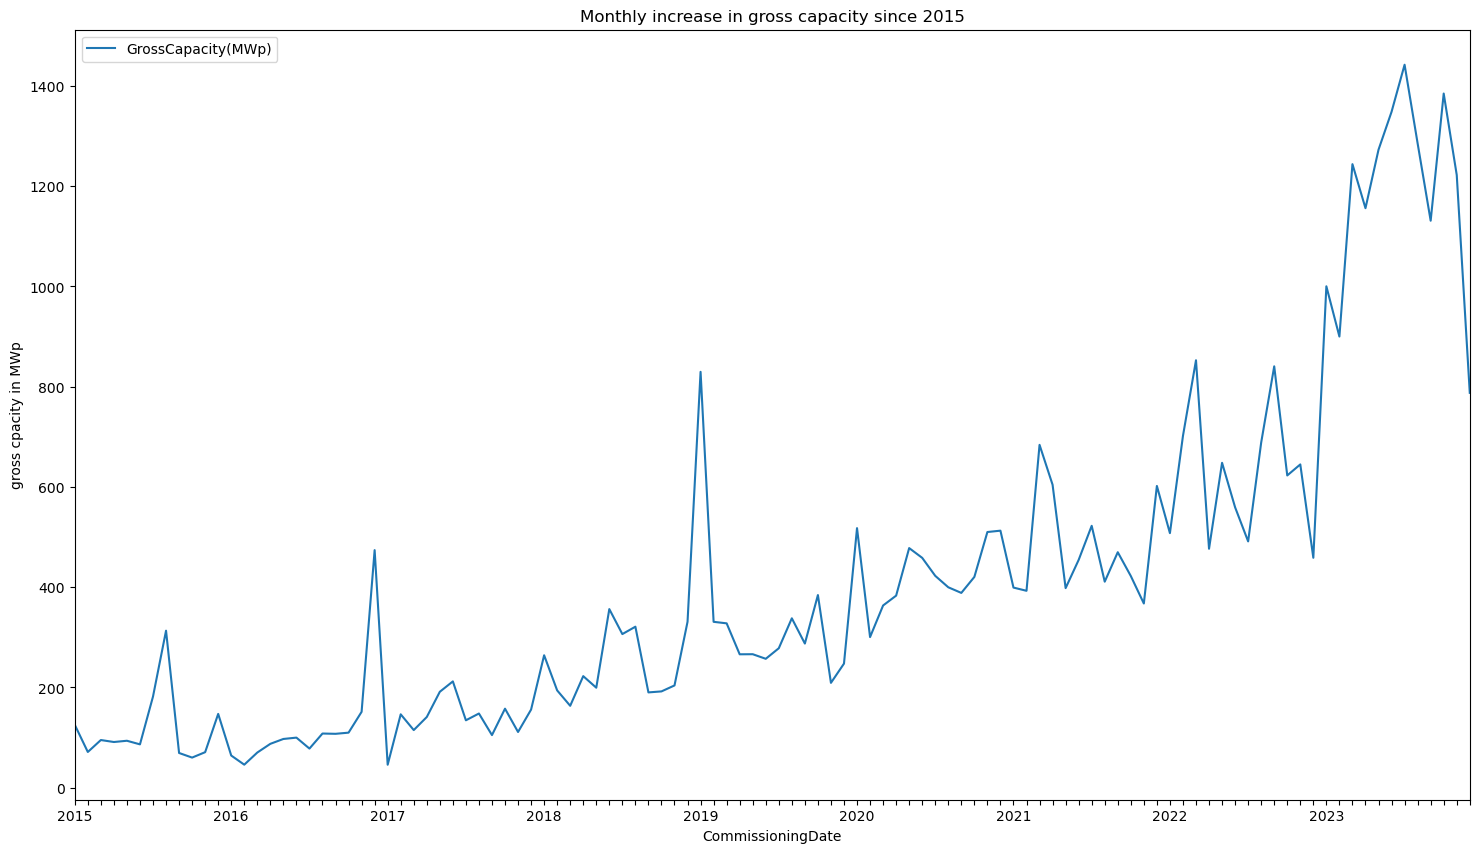

In [74]:
fig = group_months.plot(kind = 'line', title = 'Monthly increase in gross capacity since 2015', figsize=(18,10), xticks = group_months.index, ylabel = "gross cpacity in MWp")
legend = fig.legend(loc = "upper left")

Development: 
* The monthly increase has generally been rising since 2015, which can be explained by decreasing PV system prices and the political focus on renewable energy. Additionally, incentives and CO2 taxes make solar power increasingly attractive. [[3]](https://www.ise.fraunhofer.de/de/veroeffentlichungen/studien/aktuelle-fakten-zur-photovoltaik-in-deutschland.html)  
* From October 2015 to December 2016, subsidies were not reduced due to low growth. However, the initial subsidies in 2015 may explain the brief peak. Furthermore, the subsidies may have caused the growth at the end of 2016. [[4]](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Allgemeines/Presse/Pressemitteilungen/2016/160930_PV.pdf?__blob=publicationFile&v=1)
* In November 2018, the VDE standards were changed: With the new standards, new, more expensive meters were required, and old meters had to be replaced.[[5]](https://www.photovoltaik.eu/recht/neue-vde-ar-n-4105)
* Peak in 2019: Feed-in tariffs/subsidies were massively reduced in 2019. Originally planned for January 2019, this was slightly postponed. Therefore, construction accelerated before the changes. [[6]](https://www.deutsche-handwerks-zeitung.de/solarstrom-weniger-foerderung-fuer-grosse-anlagen-ab-2019-135394/)
* In 2022, there was a price increase due to supply shortages, increased raw material prices, and geopolitical uncertainty, explaining the decline in mid-2022. Afterwards, the price fell again, leading to the subsequent increase.[[7]](https://www.zolar.de/blog/preisentwicklung-photovoltaik)
* Strongest growth (2023): High energy prices make it more attractive to produce one's own electricity with PV systems. Especially since the electricity price cap ends in early 2024.[[2]](https://www.ise.fraunhofer.de/de/veroeffentlichungen/studien/aktuelle-fakten-zur-photovoltaik-in-deutschland.html) [[8]](https://www.bundesnetzagentur.de/DE/Vportal/Energie/EnergiepreiseSpezial/2024/start.html) 

### Subtask_5g

Visualisation of the Gross Capacity since 2000

In [77]:
since_2000 = df_pv.loc[df_pv['CommissioningDate'].dt.year >= 2000]
since_2000 = since_2000[['CommissioningDate', 'GrossCapacity(kWp)']]
since_2000 = since_2000.sort_values(by = 'CommissioningDate')
per = since_2000['CommissioningDate'].dt.to_period("M")
group_months = since_2000.groupby(per)
group_months = group_months.sum()
group_months = group_months.cumsum()
group_months['GrossCapacity(MWp)'] = group_months['GrossCapacity(kWp)']/1000
group_months['GrossCapacity(GWp)'] = group_months['GrossCapacity(kWp)']/1000/1000
group_months = group_months.drop(columns = ['GrossCapacity(MWp)', 'GrossCapacity(kWp)'])

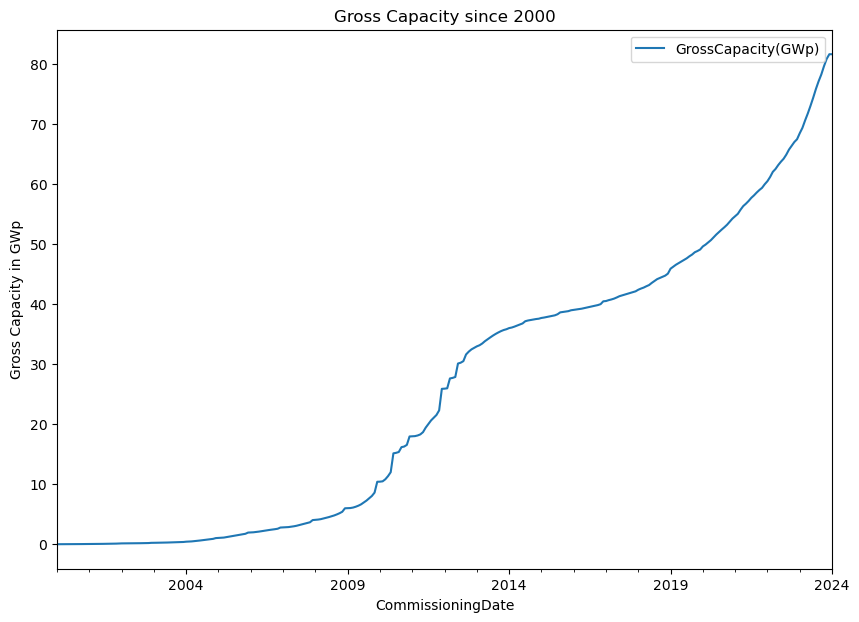

In [76]:
fig = group_months.plot(kind = 'line', title = 'Gross Capacity since 2000', ylabel = "Gross Capacity in GWp", figsize = (10,7))

The currently installed gross capacity in Germany is approximately 81 GWp. A significant increase has been observed since 2019. From 2009 to 2014, there was also a strong increase, but in 2014, there was a sharp decline in growth, resulting in the plateau from 2014 to 2019.

### Subtask_5h

Calculating the currently installed gross capacity per federal state

In [78]:
states = df_pv.groupby('FederalState')['GrossCapacity(kWp)'].sum()
states = states.reset_index()
states['GrossCapacity(GWp)'] = states['GrossCapacity(kWp)']/1000/1000
states = states.drop(columns = 'GrossCapacity(kWp)')
states

FederalState  GrossCapacity(GWp)
0   Ausschließliche Wirtschaftszone            0.000003
1                 Baden-Württemberg           10.170394
2                            Bayern           22.256876
3                            Berlin            0.271644
4                       Brandenburg            6.580525
5                            Bremen            0.095756
6                           Hamburg            0.125440
7                            Hessen            3.735959
8            Mecklenburg-Vorpommern            3.782182
9                     Niedersachsen            7.009584
10              Nordrhein-Westfalen            9.716998
11                  Rheinland-Pfalz            4.090077
12                         Saarland            0.854793
13                          Sachsen            3.493243
14                   Sachsen-Anhalt            4.148092
15               Schleswig-Holstein            2.971237
16                        Thüringen            2.419057

In [79]:
replace_dict = {'Baden-Württemberg': 'DE-BW', 'Bayern': 'DE-BY', 'Berlin': 'DE-BE', 'Brandenburg': 'DE-BB', 'Bremen': 'DE-HB', 'Hamburg': 'DE-HH', 'Hessen': 'DE-HE', 'Mecklenburg-Vorpommern': 'DE-MV', 'Niedersachsen': 'DE-NI', 'Nordrhein-Westfalen': 'DE-NW', 'Rheinland-Pfalz': 'DE-RP', 'Saarland': 'DE-SL', 'Sachsen': 'DE-SN', 'Sachsen-Anhalt': 'DE-ST', 'Schleswig-Holstein': 'DE-SH', 'Thüringen': 'DE-TH'}
states = states.replace(replace_dict)

Darstellung der Bruttoleistung pro Bundesland in einer Choroplethen-Karte

In [84]:
m = folium.Map(location=[51.1657,10.4515], zoom_start=5.5)

folium.Choropleth(
    geo_data= r'Daten\bundeslaender_geo.json',
    name='choropleth',
    data=states,
    columns=['FederalState', 'GrossCapacity(GWp)'],
    key_on='feature.properties.id',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color="purple",
    nan_fill_opacity=0.4,
    legend_name='GrossCapacity(GWp)'
).add_to(m)

folium.LayerControl().add_to(m)

m

You can clearly see, that Bavaria as the largest state also has the highest Gross Capacity. Although most large installations are in Brandenburg and Mecklenburg-Vorpommern, the gross capacity of these two federal states does not surpass that of Bavaria. 

### Subtask_5i

Wordcloud of names of the PV installations

In [87]:
#drop rows where the power plant name is missing
df_wordcloud = df_pv.drop(df_pv[(df_pv['PowerPlantName'].isnull())].index )

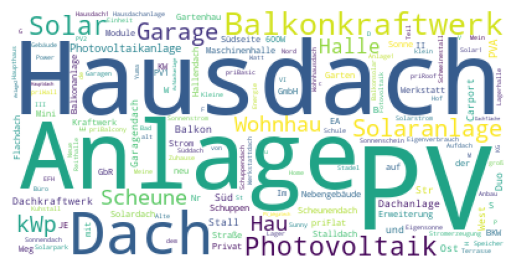

In [86]:
names = " ".join(i for i in df_wordcloud['PowerPlantName'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(names)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The biggest words are "Hausdach" = "house roof", "Anlage" = "facility", "PV", "Dach" = "roof" and "Balkonkraftwerk" = "balcony power plant". 

### Subtask_5j

Merging the solar power generation data and the gross capacity per day into one DataFrame. Afterwards we will save it into a CSV file. 

In [88]:
df_generation_capacity = pd.DataFrame()
df_generation_capacity['Solar(GWh)'] = df_el['Solar(GWh)']
df_generation_capacity

Solar(GWh)
Day                   
2018-01-01       31.10
2018-01-02       17.20
2018-01-03       13.80
2018-01-04        9.80
2018-01-05       19.40
...                ...
2023-12-27       51.65
2023-12-28       32.45
2023-12-29       30.52
2023-12-30       47.41
2023-12-31       26.35

[2191 rows x 1 columns]

In [89]:
df_pv_gross_capacity = df_pv.groupby('CommissioningDate')['GrossCapacity(kWp)'].sum()
df_pv_gross_capacity = df_pv_gross_capacity.cumsum()
since_2018 = df_pv.loc[df_pv['CommissioningDate'].dt.year >= 2018]
df_pv_gross_capacity

CommissioningDate
1900-01-01    2.504000e+01
1900-02-24    3.604000e+01
1904-04-13    4.264000e+01
1905-11-08    4.754000e+01
1906-07-27    5.315000e+01
                  ...     
2023-12-28    8.171250e+07
2023-12-29    8.171818e+07
2023-12-30    8.172091e+07
2023-12-31    8.172186e+07
2024-01-01    8.172186e+07
Name: GrossCapacity(kWp), Length: 11897, dtype: float64

In [93]:
#Mergen of Gross Capacity and Solar Power
df_generation_capacity = pd.merge(left = df_generation_capacity, right = df_pv_gross_capacity, how = 'left', left_on = df_generation_capacity.index, right_on = df_pv_gross_capacity.index)
#Changing the index to commissioning date, converting gross capacity to GWp
df_generation_capacity = df_generation_capacity.rename(columns = {'key_0': 'CommissioningDate'})
df_generation_capacity = df_generation_capacity.set_index('CommissioningDate') 
df_generation_capacity['GrossCapacity(GWp)'] = df_generation_capacity['GrossCapacity(kWp)']/1000/1000
df_generation_capacity = df_generation_capacity.drop(columns = ['GrossCapacity(kWp)'])
df_generation_capacity

Solar(GWh)  GrossCapacity(kWp)_x  GrossCapacity(kWp)_y  \
CommissioningDate                                                           
2018-01-01              31.10          4.220549e+07          4.220549e+07   
2018-01-02              17.20          4.223452e+07          4.223452e+07   
2018-01-03              13.80          4.224242e+07          4.224242e+07   
2018-01-04               9.80          4.225077e+07          4.225077e+07   
2018-01-05              19.40          4.226081e+07          4.226081e+07   
...                       ...                   ...                   ...   
2023-12-27              51.65          8.170619e+07          8.170619e+07   
2023-12-28              32.45          8.171250e+07          8.171250e+07   
2023-12-29              30.52          8.171818e+07          8.171818e+07   
2023-12-30              47.41          8.172091e+07          8.172091e+07   
2023-12-31              26.35          8.172186e+07          8.172186e+07   

                   GrossCapacity(GWp)  
CommissioningDate                      
2018-01-01                  42.205488  
2018-01-02                  42.234524  
2018-01-03                  42.242417  
2018-01-04                  42.250772  
2018-01-05                  42.260813  
...                               ...  
2023-12-27                  81.706187  
2023-12-28                  81.712498  
2023-12-29                  81.718183  
2023-12-30                  81.720906  
2023-12-31                  81.721859  

[2191 rows x 4 columns]

Saving the DataFrame into a CSV file. 

In [95]:
df_generation_capacity.to_csv('erzeugung_leistung.csv') #name was given by the professor

# Task6

Building a Linear Regression Model to predict solar production in a specific week. 

### Subtask_6a

Merging the Data

In [106]:
df_model = pd.DataFrame()
df_model = df_sun #Dataframe with Solar(GWh), shortwave_radiation_sum, daylight_duration, sunshine_duration from task 4
df_model['GrossCapacity(GWp)'] = df_generation_capacity['GrossCapacity(GWp)'] 
df_model = df_model.reset_index()
df_model = df_model.set_index('Day')
df_model

Solar(GWh)  shortwave_radiation_sum  daylight_duration  \
Day                                                                  
2018-01-01       31.10                     3.22           8.251632   
2018-01-02       17.20                     1.93           8.269270   
2018-01-03       13.80                     1.90           8.288358   
2018-01-04        9.80                     0.76           8.308922   
2018-01-05       19.40                     1.91           8.331191   
...                ...                      ...                ...   
2023-12-27       51.65                     3.00           8.178308   
2023-12-28       32.45                     1.95           8.188211   
2023-12-29       30.52                     3.14           8.199767   
2023-12-30       47.41                     2.58           8.212935   
2023-12-31       26.35                     3.28           8.227687   

            sunshine_duration  GrossCapacitiy(GWp)  GrossCapacity(GWp)  
Day                                                                     
2018-01-01           4.999405            42.205488           42.205488  
2018-01-02           1.411293            42.234524           42.234524  
2018-01-03           1.610004            42.242417           42.242417  
2018-01-04           0.000000            42.250772           42.250772  
2018-01-05           2.095850            42.260813           42.260813  
...                       ...                  ...                 ...  
2023-12-27           3.451000            81.706187           81.706187  
2023-12-28           1.000000            81.712498           81.712498  
2023-12-29           4.666962            81.718183           81.718183  
2023-12-30           3.306888            81.720906           81.720906  
2023-12-31           3.674354            81.721859           81.721859  

[2191 rows x 6 columns]

Save the DataFrame as a CSV file. 

In [107]:
df_model.to_csv('dataset_model.csv')

Train-Test-Split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(columns = ['Solar(GWh)']), df_model['Solar(GWh)'], test_size = 0.4, train_size = 0.6)

Modeltraining

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

regression_line = model.predict(X_train)

In [110]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_error = mean_absolute_percentage_error(y_train, train_predictions)
test_error = mean_absolute_percentage_error(y_test, test_predictions)

print("Mean relative error on the training dataset:", train_error)
print("Mean relative error on the test dataset:", test_error)

Mean relative error on the training dataset: 0.28534969433071977
Mean relative error on the test dataset: 0.26484380054059725


The mean relative error is always between 25 and 30%. 

### Subtask_6b

Applying the model to predict the solar power generated in Germany for each day from January 29, 2024, to February 4, 2024.

In [111]:
df_model_b = df_model.reset_index()
day_2901 = df_model_b.loc[(df_model_b['Day'].dt.month == 1) & (df_model_b['Day'].dt.day == 29)]
day_3001 = df_model_b.loc[(df_model_b['Day'].dt.month == 1) & (df_model_b['Day'].dt.day == 30)]
day_3101 = df_model_b.loc[(df_model_b['Day'].dt.month == 1) & (df_model_b['Day'].dt.day == 31)]
day_0102 = df_model_b.loc[(df_model_b['Day'].dt.month == 2) & (df_model_b['Day'].dt.day == 1)]
day_0202 = df_model_b.loc[(df_model_b['Day'].dt.month == 2) & (df_model_b['Day'].dt.day == 2)]
day_0302 = df_model_b.loc[(df_model_b['Day'].dt.month == 2) & (df_model_b['Day'].dt.day == 3)]
day_0402 = df_model_b.loc[(df_model_b['Day'].dt.month == 2) & (df_model_b['Day'].dt.day == 4)]

day_0402

Day  Solar(GWh)  shortwave_radiation_sum  daylight_duration  \
34   2018-02-04       27.60                     5.35           9.551051   
399  2019-02-04       59.90                     7.07           9.539571   
764  2020-02-04       51.50                     5.48           9.522337   
1130 2021-02-04       64.70                     5.27           9.562641   
1495 2022-02-04       35.60                     2.03           9.552636   
1860 2023-02-04       69.76                     6.06           9.539920   

      sunshine_duration  GrossCapacitiy(GWp)  GrossCapacity(GWp)  
34             6.275132            42.484445           42.484445  
399            6.534560            45.984401           45.984401  
764            7.578851            49.730844           49.730844  
1130           7.785914            54.828248           54.828248  
1495           0.846342            60.610492           60.610492  
1860           5.156495            68.666665           68.666665

In [120]:
df_prognose = pd.DataFrame()
gross_capacity = df_model.loc['2023-12-31']['GrossCapacity(GWp)']

# Variables: Median of the same day of the previous years
days = [day_2901, day_3001, day_3101, day_0102, day_0202, day_0302, day_0402]
dates = ['2024-01-29', '2024-01-30', ' 2024-01-31', '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04']
date_count = 0
for day in days: 
    entry = pd.DataFrame([{'Day':pd.to_datetime(dates[date_count]), 'shortwave_radiation_sum': day['shortwave_radiation_sum'].median(), 'daylight_duration':day['daylight_duration'].median(), 'sunshine_duration': day['sunshine_duration'].median(), 'GrossCapacity(GWp)': gross_capacity}])
    df_prognose = pd.concat([df_prognose, entry], ignore_index=True)
    date_count = date_count + 1

df_prognose


Day  shortwave_radiation_sum  daylight_duration  sunshine_duration  \
0 2024-01-29                    2.845           9.235849           1.810194   
1 2024-01-30                    4.180           9.285957           3.750339   
2 2024-01-31                    2.625           9.336750           2.258207   
3 2024-02-01                    2.960           9.388161           0.757769   
4 2024-02-02                    2.775           9.440130           0.980030   
5 2024-02-03                    2.345           9.492592           1.000000   
6 2024-02-04                    5.415           9.545485           6.404846   

   GrossCapacity(GWp)  
0           81.721859  
1           81.721859  
2           81.721859  
3           81.721859  
4           81.721859  
5           81.721859  
6           81.721859

In [123]:
df_prognose = df_prognose.set_index('Day')

In [125]:
#test = model.predict(df_prognose)

#print(test)

Predictions for solar power in GWh:
* 29.01.2024: 63.72329016
* 30.01.2024: 75.61016831
* 31.01.2024: 62.9126464
* 01.02.2024: 65.17967879
* 02.02.2024: 64.19033184
* 03.02.2024: 61.16399702
* 04.02.2024: 88.5308845

### Subtask_6c
Analysis of the limitations of the model.

The "newer" the date for which the model is asked to make a prediction, the larger the mean error becomes. For example, if the model is only trained on data after 2023, it has an error of 45%. This is likely due to the significant increase in installed gross capacity, while solar power production remains relatively stable in the winter.

The model performs better when considering only summer months, reducing the error to approximately 15%. Unfortunately, separating summer and winter months does not improve the prediction for winter months.

The prediction relies on solar variables. Since these variables are not known for the future, we have taken the median of the same day of the previous 5 years and used it as the value of the variable. This means the model predicts based on non-real values, likely further increasing the error to 30%. Thus, the model is not particularly reliable. For a better future forecast of values, the underlying variables themselves need to be more reliable.

The gross capacity values continuously increase, while solar-related variables fluctuate in each year, depending on the seasons. For instance, gross capacity may be the same in winter as in summer, yet significantly less solar power is produced due to lower solar-related variables. Improving the model may involve giving more emphasis to solar-related variables.

Furthermore, there is high variance in weather when considering specific days. Not every year has the same weather on a particular date. A possible improvement could involve extending the forecast period from a specific day to, for example, a week or even a month to counteract weather variance.

# References 

 [1] [EnBw.com: Offshore-Windparks – alle Fakten zur Windenergie auf See](https://www.enbw.com/unternehmen/eco-journal/offshore-windparks-alle-fakten-zur-windenergie-auf-see.html#:~:text=Ende%202021%20war%20die%20Anzahl,an%20Offshore-Anlagen%20mit%201.501.)

[2] [Historical Weather API](https://open-meteo.com/en/docs/historical-weather-api)

[3] [Fraunhofer: Aktuelle Fakten zur Photovoltaik in Deutschland](https://www.ise.fraunhofer.de/de/veroeffentlichungen/studien/aktuelle-fakten-zur-photovoltaik-in-deutschland.html)

[4] [Bundesnetzagentur: Fördersätze für Photovoltaik-Anlagen in der
Festvergütung bleiben stabil](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Allgemeines/Presse/Pressemitteilungen/2016/160930_PV.pdf?__blob=publicationFile&v=1)

[5] [Photovoltaik.eu: Neue VDE-AR-N 4105](https://www.photovoltaik.eu/recht/neue-vde-ar-n-4105)

[6] [DHZ: Solarstrom: Weniger Förderungen für große Anlagen ab 2019](https://www.deutsche-handwerks-zeitung.de/solarstrom-weniger-foerderung-fuer-grosse-anlagen-ab-2019-135394/)

[7] [Zolar: Preisentwicklung Photovoltaik](https://www.zolar.de/blog/preisentwicklung-photovoltaik)

[8] [Bundesnetzagentur: Preis­än­de­run­gen zum Jah­res­wech­sel 2023/2024](https://www.bundesnetzagentur.de/DE/Vportal/Energie/EnergiepreiseSpezial/2024/start.html)

[^1]: (https://www.enbw.com/unternehmen/eco-journal/offshore-windparks-alle-fakten-zur-windenergie-auf-see.html#:~:text=Ende%202021%20war%20die%20Anzahl,an%20Offshore-Anlagen%20mit%201.501.)